In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam

In [2]:
#load the model
#import load model
from keras.models import load_model
model = load_model('cnn_best_model.h5')

In [3]:
#load the cleaned data
df = pd.read_csv('KDDTrain+_cleaned.csv')

In [4]:
X = df.drop(['type','class'], axis=1)
y = df['type']
# one hot encoding
y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# convert to numpy array
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [5]:
X_test2 = np.squeeze(X_test)
X_test2.shape
X_train2 = np.squeeze(X_train)
X_train2.shape

(269372, 120)

In [6]:
#use SHAP to explain the model
import tensorflow as tf
import shap
shap.initjs()
explainer = shap.KernelExplainer(model.predict, X_train2[0:100])
shape_values = explainer.shap_values(X_test2[1000:2000])

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


4/4 [==============================] - 0s 5ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

6757/6757 [==============================] - 20s 3ms/step


  0%|          | 1/1000 [00:24<6:50:45, 24.67s/it]

6757/6757 [==============================] - 22s 3ms/step


  0%|          | 2/1000 [00:50<7:01:18, 25.33s/it]

6757/6757 [==============================] - 21s 3ms/step


  0%|          | 3/1000 [01:15<7:01:40, 25.38s/it]

6757/6757 [==============================] - 21s 3ms/step


  0%|          | 4/1000 [01:40<6:59:21, 25.26s/it]

6757/6757 [==============================] - 21s 3ms/step


  0%|          | 5/1000 [02:06<6:57:51, 25.20s/it]

6757/6757 [==============================] - 21s 3ms/step


  1%|          | 6/1000 [02:31<6:57:02, 25.17s/it]

6757/6757 [==============================] - 21s 3ms/step


  1%|          | 7/1000 [02:56<6:56:24, 25.16s/it]

6757/6757 [==============================] - 21s 3ms/step


  1%|          | 8/1000 [03:21<6:55:49, 25.15s/it]

6757/6757 [==============================] - 21s 3ms/step


  1%|          | 9/1000 [03:46<6:55:25, 25.15s/it]

6757/6757 [==============================] - 21s 3ms/step


  1%|          | 10/1000 [04:11<6:54:04, 25.10s/it]

6757/6757 [==============================] - 21s 3ms/step


  1%|          | 11/1000 [04:36<6:53:58, 25.11s/it]

6757/6757 [==============================] - 21s 3ms/step


  1%|          | 12/1000 [05:01<6:53:32, 25.11s/it]

6763/6763 [==============================] - 21s 3ms/step


  1%|▏         | 13/1000 [05:27<6:57:39, 25.39s/it]

6757/6757 [==============================] - 21s 3ms/step


  1%|▏         | 14/1000 [05:52<6:55:32, 25.29s/it]

6763/6763 [==============================] - 21s 3ms/step


  2%|▏         | 15/1000 [06:17<6:53:52, 25.21s/it]

6757/6757 [==============================] - 21s 3ms/step


  2%|▏         | 16/1000 [06:42<6:52:19, 25.14s/it]

6757/6757 [==============================] - 21s 3ms/step


  2%|▏         | 17/1000 [07:07<6:50:52, 25.08s/it]

6757/6757 [==============================] - 21s 3ms/step


  2%|▏         | 18/1000 [07:32<6:49:33, 25.02s/it]

6757/6757 [==============================] - 22s 3ms/step


  2%|▏         | 19/1000 [07:59<6:55:10, 25.39s/it]

6757/6757 [==============================] - 21s 3ms/step


  2%|▏         | 20/1000 [08:24<6:52:58, 25.28s/it]

6757/6757 [==============================] - 22s 3ms/step


  2%|▏         | 21/1000 [08:50<6:57:17, 25.57s/it]

6757/6757 [==============================] - 21s 3ms/step


  2%|▏         | 22/1000 [09:15<6:54:43, 25.44s/it]

6757/6757 [==============================] - 21s 3ms/step


  2%|▏         | 23/1000 [09:40<6:53:40, 25.40s/it]

6757/6757 [==============================] - 21s 3ms/step


  2%|▏         | 24/1000 [10:05<6:50:46, 25.25s/it]

6757/6757 [==============================] - 21s 3ms/step


  2%|▎         | 25/1000 [10:30<6:48:56, 25.17s/it]

6757/6757 [==============================] - 21s 3ms/step


  3%|▎         | 26/1000 [10:55<6:47:38, 25.11s/it]

6757/6757 [==============================] - 21s 3ms/step


  3%|▎         | 27/1000 [11:20<6:46:32, 25.07s/it]

6757/6757 [==============================] - 21s 3ms/step


  3%|▎         | 28/1000 [11:45<6:45:50, 25.05s/it]

6757/6757 [==============================] - 21s 3ms/step


  3%|▎         | 29/1000 [12:10<6:45:24, 25.05s/it]

6757/6757 [==============================] - 21s 3ms/step


  3%|▎         | 30/1000 [12:35<6:44:27, 25.02s/it]

6757/6757 [==============================] - 21s 3ms/step


  3%|▎         | 31/1000 [13:00<6:43:55, 25.01s/it]

6757/6757 [==============================] - 21s 3ms/step


  3%|▎         | 32/1000 [13:25<6:43:04, 24.98s/it]

6757/6757 [==============================] - 21s 3ms/step


  3%|▎         | 33/1000 [13:50<6:43:30, 25.04s/it]

6763/6763 [==============================] - 21s 3ms/step


  3%|▎         | 34/1000 [14:15<6:42:29, 25.00s/it]

6757/6757 [==============================] - 21s 3ms/step


  4%|▎         | 35/1000 [14:40<6:41:36, 24.97s/it]

6757/6757 [==============================] - 21s 3ms/step


  4%|▎         | 36/1000 [15:05<6:40:49, 24.95s/it]

6757/6757 [==============================] - 21s 3ms/step


  4%|▎         | 37/1000 [15:30<6:41:26, 25.01s/it]

6757/6757 [==============================] - 21s 3ms/step


  4%|▍         | 38/1000 [15:55<6:42:30, 25.10s/it]

6757/6757 [==============================] - 21s 3ms/step


  4%|▍         | 39/1000 [16:20<6:41:08, 25.05s/it]

6757/6757 [==============================] - 21s 3ms/step


  4%|▍         | 40/1000 [16:45<6:40:27, 25.03s/it]

6757/6757 [==============================] - 21s 3ms/step


  4%|▍         | 41/1000 [17:10<6:39:51, 25.02s/it]

6757/6757 [==============================] - 22s 3ms/step


  4%|▍         | 42/1000 [17:36<6:43:27, 25.27s/it]

6757/6757 [==============================] - 21s 3ms/step


  4%|▍         | 43/1000 [18:01<6:42:38, 25.24s/it]

6757/6757 [==============================] - 22s 3ms/step


  4%|▍         | 44/1000 [18:27<6:45:39, 25.46s/it]

6757/6757 [==============================] - 21s 3ms/step


  4%|▍         | 45/1000 [18:52<6:42:15, 25.27s/it]

6757/6757 [==============================] - 20s 3ms/step


  5%|▍         | 46/1000 [19:16<6:36:58, 24.97s/it]

6757/6757 [==============================] - 21s 3ms/step


  5%|▍         | 47/1000 [19:41<6:35:22, 24.89s/it]

6757/6757 [==============================] - 21s 3ms/step


  5%|▍         | 48/1000 [20:06<6:35:37, 24.93s/it]

6757/6757 [==============================] - 21s 3ms/step


  5%|▍         | 49/1000 [20:31<6:36:03, 24.99s/it]

6757/6757 [==============================] - 22s 3ms/step


  5%|▌         | 50/1000 [20:57<6:38:41, 25.18s/it]

6757/6757 [==============================] - 21s 3ms/step


  5%|▌         | 51/1000 [21:22<6:38:26, 25.19s/it]

6763/6763 [==============================] - 21s 3ms/step


  5%|▌         | 52/1000 [21:47<6:38:06, 25.20s/it]

6757/6757 [==============================] - 21s 3ms/step


  5%|▌         | 53/1000 [22:12<6:37:21, 25.18s/it]

6757/6757 [==============================] - 21s 3ms/step


  5%|▌         | 54/1000 [22:38<6:38:21, 25.27s/it]

6757/6757 [==============================] - 21s 3ms/step


  6%|▌         | 55/1000 [23:03<6:37:51, 25.26s/it]

6757/6757 [==============================] - 21s 3ms/step


  6%|▌         | 56/1000 [23:28<6:37:00, 25.23s/it]

6757/6757 [==============================] - 22s 3ms/step


  6%|▌         | 57/1000 [23:55<6:41:58, 25.58s/it]

6763/6763 [==============================] - 21s 3ms/step


  6%|▌         | 58/1000 [24:19<6:37:12, 25.30s/it]

6757/6757 [==============================] - 23s 3ms/step


  6%|▌         | 59/1000 [24:46<6:45:22, 25.85s/it]

6757/6757 [==============================] - 22s 3ms/step


  6%|▌         | 60/1000 [25:12<6:45:59, 25.91s/it]

6757/6757 [==============================] - 22s 3ms/step


  6%|▌         | 61/1000 [25:39<6:46:13, 25.96s/it]

6757/6757 [==============================] - 22s 3ms/step


  6%|▌         | 62/1000 [26:05<6:46:28, 26.00s/it]

6757/6757 [==============================] - 22s 3ms/step


  6%|▋         | 63/1000 [26:31<6:46:02, 26.00s/it]

6757/6757 [==============================] - 22s 3ms/step


  6%|▋         | 64/1000 [26:57<6:45:18, 25.98s/it]

6757/6757 [==============================] - 22s 3ms/step


  6%|▋         | 65/1000 [27:22<6:44:28, 25.96s/it]

6757/6757 [==============================] - 22s 3ms/step


  7%|▋         | 66/1000 [27:48<6:43:36, 25.93s/it]

6757/6757 [==============================] - 22s 3ms/step


  7%|▋         | 67/1000 [28:14<6:43:33, 25.95s/it]

6757/6757 [==============================] - 22s 3ms/step


  7%|▋         | 68/1000 [28:41<6:44:03, 26.01s/it]

6757/6757 [==============================] - 22s 3ms/step


  7%|▋         | 69/1000 [29:07<6:44:37, 26.08s/it]

6757/6757 [==============================] - 22s 3ms/step


  7%|▋         | 70/1000 [29:33<6:45:41, 26.17s/it]

6757/6757 [==============================] - 22s 3ms/step


  7%|▋         | 71/1000 [29:59<6:44:39, 26.13s/it]

6757/6757 [==============================] - 22s 3ms/step


  7%|▋         | 72/1000 [30:25<6:44:37, 26.16s/it]

6757/6757 [==============================] - 22s 3ms/step


  7%|▋         | 73/1000 [30:51<6:43:02, 26.09s/it]

6763/6763 [==============================] - 22s 3ms/step


  7%|▋         | 74/1000 [31:17<6:41:39, 26.02s/it]

6757/6757 [==============================] - 22s 3ms/step


  8%|▊         | 75/1000 [31:43<6:40:50, 26.00s/it]

6757/6757 [==============================] - 22s 3ms/step


  8%|▊         | 76/1000 [32:09<6:40:21, 26.00s/it]

6757/6757 [==============================] - 22s 3ms/step


  8%|▊         | 77/1000 [32:35<6:41:04, 26.07s/it]

6757/6757 [==============================] - 22s 3ms/step


  8%|▊         | 78/1000 [33:01<6:39:17, 25.98s/it]

6757/6757 [==============================] - 23s 3ms/step


  8%|▊         | 79/1000 [33:28<6:41:20, 26.15s/it]

6757/6757 [==============================] - 22s 3ms/step


  8%|▊         | 80/1000 [33:54<6:40:29, 26.12s/it]

6757/6757 [==============================] - 22s 3ms/step


  8%|▊         | 81/1000 [34:20<6:38:55, 26.05s/it]

6757/6757 [==============================] - 22s 3ms/step


  8%|▊         | 82/1000 [34:46<6:38:46, 26.06s/it]

6757/6757 [==============================] - 22s 3ms/step


  8%|▊         | 83/1000 [35:12<6:37:24, 26.00s/it]

6757/6757 [==============================] - 22s 3ms/step


  8%|▊         | 84/1000 [35:38<6:37:10, 26.02s/it]

6757/6757 [==============================] - 22s 3ms/step


  8%|▊         | 85/1000 [36:04<6:38:18, 26.12s/it]

6757/6757 [==============================] - 22s 3ms/step


  9%|▊         | 86/1000 [36:30<6:37:09, 26.07s/it]

6757/6757 [==============================] - 22s 3ms/step


  9%|▊         | 87/1000 [36:56<6:36:41, 26.07s/it]

6757/6757 [==============================] - 22s 3ms/step


  9%|▉         | 88/1000 [37:22<6:36:51, 26.11s/it]

6763/6763 [==============================] - 22s 3ms/step


  9%|▉         | 89/1000 [37:48<6:36:18, 26.10s/it]

6763/6763 [==============================] - 22s 3ms/step


  9%|▉         | 90/1000 [38:14<6:35:35, 26.08s/it]

6757/6757 [==============================] - 23s 3ms/step


  9%|▉         | 91/1000 [38:42<6:40:41, 26.45s/it]

6757/6757 [==============================] - 23s 3ms/step


  9%|▉         | 92/1000 [39:09<6:42:29, 26.60s/it]

6757/6757 [==============================] - 22s 3ms/step


  9%|▉         | 93/1000 [39:35<6:40:01, 26.46s/it]

6757/6757 [==============================] - 20s 3ms/step


  9%|▉         | 94/1000 [39:58<6:25:30, 25.53s/it]

6757/6757 [==============================] - 20s 3ms/step


 10%|▉         | 95/1000 [40:22<6:19:00, 25.13s/it]

6757/6757 [==============================] - 22s 3ms/step


 10%|▉         | 96/1000 [40:48<6:22:37, 25.40s/it]

6757/6757 [==============================] - 22s 3ms/step


 10%|▉         | 97/1000 [41:15<6:26:32, 25.68s/it]

6763/6763 [==============================] - 22s 3ms/step


 10%|▉         | 98/1000 [41:41<6:27:27, 25.77s/it]

6757/6757 [==============================] - 22s 3ms/step


 10%|▉         | 99/1000 [42:07<6:28:29, 25.87s/it]

6757/6757 [==============================] - 22s 3ms/step


 10%|█         | 100/1000 [42:33<6:28:34, 25.91s/it]

6757/6757 [==============================] - 22s 3ms/step


 10%|█         | 101/1000 [42:59<6:28:22, 25.92s/it]

6757/6757 [==============================] - 22s 3ms/step


 10%|█         | 102/1000 [43:25<6:28:11, 25.94s/it]

6757/6757 [==============================] - 22s 3ms/step


 10%|█         | 103/1000 [43:51<6:28:33, 25.99s/it]

6757/6757 [==============================] - 22s 3ms/step


 10%|█         | 104/1000 [44:17<6:28:37, 26.02s/it]

6757/6757 [==============================] - 22s 3ms/step


 10%|█         | 105/1000 [44:43<6:28:02, 26.01s/it]

6757/6757 [==============================] - 22s 3ms/step


 11%|█         | 106/1000 [45:09<6:27:20, 26.00s/it]

6763/6763 [==============================] - 22s 3ms/step


 11%|█         | 107/1000 [45:35<6:27:11, 26.02s/it]

6757/6757 [==============================] - 22s 3ms/step


 11%|█         | 108/1000 [46:01<6:26:38, 26.01s/it]

6757/6757 [==============================] - 22s 3ms/step


 11%|█         | 109/1000 [46:27<6:27:20, 26.08s/it]

6757/6757 [==============================] - 22s 3ms/step


 11%|█         | 110/1000 [46:53<6:27:42, 26.14s/it]

6757/6757 [==============================] - 22s 3ms/step


 11%|█         | 111/1000 [47:20<6:28:01, 26.19s/it]

6757/6757 [==============================] - 23s 3ms/step


 11%|█         | 112/1000 [47:46<6:29:46, 26.34s/it]

6757/6757 [==============================] - 23s 3ms/step


 11%|█▏        | 113/1000 [48:13<6:29:57, 26.38s/it]

6757/6757 [==============================] - 22s 3ms/step


 11%|█▏        | 114/1000 [48:39<6:28:16, 26.29s/it]

6757/6757 [==============================] - 22s 3ms/step


 12%|█▏        | 115/1000 [49:05<6:26:42, 26.22s/it]

6757/6757 [==============================] - 22s 3ms/step


 12%|█▏        | 116/1000 [49:31<6:27:10, 26.28s/it]

6757/6757 [==============================] - 22s 3ms/step


 12%|█▏        | 117/1000 [49:58<6:30:14, 26.52s/it]

6757/6757 [==============================] - 22s 3ms/step


 12%|█▏        | 118/1000 [50:25<6:28:00, 26.40s/it]

6757/6757 [==============================] - 22s 3ms/step


 12%|█▏        | 119/1000 [50:51<6:26:02, 26.29s/it]

6757/6757 [==============================] - 22s 3ms/step


 12%|█▏        | 120/1000 [51:17<6:25:18, 26.27s/it]

6757/6757 [==============================] - 22s 3ms/step


 12%|█▏        | 121/1000 [51:43<6:23:59, 26.21s/it]

6757/6757 [==============================] - 22s 3ms/step


 12%|█▏        | 122/1000 [52:09<6:22:36, 26.15s/it]

6763/6763 [==============================] - 22s 3ms/step


 12%|█▏        | 123/1000 [52:35<6:21:27, 26.10s/it]

6757/6757 [==============================] - 22s 3ms/step


 12%|█▏        | 124/1000 [53:01<6:21:14, 26.11s/it]

6757/6757 [==============================] - 22s 3ms/step


 12%|█▎        | 125/1000 [53:27<6:20:04, 26.06s/it]

6763/6763 [==============================] - 23s 3ms/step


 13%|█▎        | 126/1000 [53:54<6:22:15, 26.24s/it]

6757/6757 [==============================] - 22s 3ms/step


 13%|█▎        | 127/1000 [54:20<6:20:39, 26.16s/it]

6757/6757 [==============================] - 22s 3ms/step


 13%|█▎        | 128/1000 [54:46<6:19:31, 26.11s/it]

6757/6757 [==============================] - 22s 3ms/step


 13%|█▎        | 129/1000 [55:12<6:18:40, 26.09s/it]

6757/6757 [==============================] - 22s 3ms/step


 13%|█▎        | 130/1000 [55:38<6:18:24, 26.10s/it]

6757/6757 [==============================] - 22s 3ms/step


 13%|█▎        | 131/1000 [56:04<6:19:22, 26.19s/it]

6763/6763 [==============================] - 22s 3ms/step


 13%|█▎        | 132/1000 [56:30<6:18:05, 26.14s/it]

6757/6757 [==============================] - 22s 3ms/step


 13%|█▎        | 133/1000 [56:56<6:16:33, 26.06s/it]

6757/6757 [==============================] - 23s 3ms/step


 13%|█▎        | 134/1000 [57:23<6:18:34, 26.23s/it]

6757/6757 [==============================] - 22s 3ms/step


 14%|█▎        | 135/1000 [57:49<6:16:37, 26.12s/it]

6757/6757 [==============================] - 22s 3ms/step


 14%|█▎        | 136/1000 [58:15<6:15:59, 26.11s/it]

6757/6757 [==============================] - 22s 3ms/step


 14%|█▎        | 137/1000 [58:41<6:15:47, 26.13s/it]

6757/6757 [==============================] - 22s 3ms/step


 14%|█▍        | 138/1000 [59:07<6:15:45, 26.15s/it]

6757/6757 [==============================] - 22s 3ms/step


 14%|█▍        | 139/1000 [59:33<6:14:06, 26.07s/it]

6757/6757 [==============================] - 22s 3ms/step


 14%|█▍        | 140/1000 [59:59<6:13:06, 26.03s/it]

6757/6757 [==============================] - 22s 3ms/step


 14%|█▍        | 141/1000 [1:00:25<6:12:53, 26.05s/it]

6757/6757 [==============================] - 22s 3ms/step


 14%|█▍        | 142/1000 [1:00:51<6:14:07, 26.16s/it]

6763/6763 [==============================] - 22s 3ms/step


 14%|█▍        | 143/1000 [1:01:17<6:12:41, 26.09s/it]

6757/6757 [==============================] - 22s 3ms/step


 14%|█▍        | 144/1000 [1:01:43<6:12:10, 26.09s/it]

6757/6757 [==============================] - 23s 3ms/step


 14%|█▍        | 145/1000 [1:02:10<6:14:11, 26.26s/it]

6757/6757 [==============================] - 22s 3ms/step


 15%|█▍        | 146/1000 [1:02:36<6:13:24, 26.23s/it]

6757/6757 [==============================] - 22s 3ms/step


 15%|█▍        | 147/1000 [1:03:03<6:13:29, 26.27s/it]

6757/6757 [==============================] - 22s 3ms/step


 15%|█▍        | 148/1000 [1:03:29<6:12:54, 26.26s/it]

6757/6757 [==============================] - 22s 3ms/step


 15%|█▍        | 149/1000 [1:03:55<6:10:55, 26.15s/it]

6757/6757 [==============================] - 22s 3ms/step


 15%|█▌        | 150/1000 [1:04:20<6:07:31, 25.94s/it]

6757/6757 [==============================] - 21s 3ms/step


 15%|█▌        | 151/1000 [1:04:45<6:04:24, 25.75s/it]

6757/6757 [==============================] - 21s 3ms/step


 15%|█▌        | 152/1000 [1:05:11<6:01:21, 25.57s/it]

6757/6757 [==============================] - 21s 3ms/step


 15%|█▌        | 153/1000 [1:05:36<5:58:17, 25.38s/it]

6757/6757 [==============================] - 21s 3ms/step


 15%|█▌        | 154/1000 [1:06:01<5:56:11, 25.26s/it]

6763/6763 [==============================] - 21s 3ms/step


 16%|█▌        | 155/1000 [1:06:26<5:55:23, 25.23s/it]

6757/6757 [==============================] - 21s 3ms/step


 16%|█▌        | 156/1000 [1:06:51<5:54:16, 25.19s/it]

6763/6763 [==============================] - 21s 3ms/step


 16%|█▌        | 157/1000 [1:07:16<5:53:05, 25.13s/it]

6757/6757 [==============================] - 21s 3ms/step


 16%|█▌        | 158/1000 [1:07:41<5:52:01, 25.09s/it]

6757/6757 [==============================] - 21s 3ms/step


 16%|█▌        | 159/1000 [1:08:06<5:50:42, 25.02s/it]

6757/6757 [==============================] - 21s 3ms/step


 16%|█▌        | 160/1000 [1:08:31<5:51:07, 25.08s/it]

6757/6757 [==============================] - 23s 3ms/step


 16%|█▌        | 161/1000 [1:08:57<5:55:30, 25.42s/it]

6757/6757 [==============================] - 21s 3ms/step


 16%|█▌        | 162/1000 [1:09:22<5:53:06, 25.28s/it]

6757/6757 [==============================] - 22s 3ms/step


 16%|█▋        | 163/1000 [1:09:47<5:52:50, 25.29s/it]

6757/6757 [==============================] - 21s 3ms/step


 16%|█▋        | 164/1000 [1:10:12<5:51:00, 25.19s/it]

6757/6757 [==============================] - 22s 3ms/step


 16%|█▋        | 165/1000 [1:10:37<5:50:05, 25.16s/it]

6757/6757 [==============================] - 21s 3ms/step


 17%|█▋        | 166/1000 [1:11:02<5:48:01, 25.04s/it]

6757/6757 [==============================] - 21s 3ms/step


 17%|█▋        | 167/1000 [1:11:27<5:47:22, 25.02s/it]

6763/6763 [==============================] - 22s 3ms/step


 17%|█▋        | 168/1000 [1:11:52<5:48:24, 25.13s/it]

6757/6757 [==============================] - 22s 3ms/step


 17%|█▋        | 169/1000 [1:12:17<5:47:07, 25.06s/it]

6757/6757 [==============================] - 22s 3ms/step


 17%|█▋        | 170/1000 [1:12:42<5:45:52, 25.00s/it]

6757/6757 [==============================] - 22s 3ms/step


 17%|█▋        | 171/1000 [1:13:07<5:44:53, 24.96s/it]

6757/6757 [==============================] - 22s 3ms/step


 17%|█▋        | 172/1000 [1:13:32<5:44:07, 24.94s/it]

6757/6757 [==============================] - 22s 3ms/step


 17%|█▋        | 173/1000 [1:13:57<5:44:47, 25.01s/it]

6757/6757 [==============================] - 22s 3ms/step


 17%|█▋        | 174/1000 [1:14:22<5:43:53, 24.98s/it]

6763/6763 [==============================] - 22s 3ms/step


 18%|█▊        | 175/1000 [1:14:47<5:42:33, 24.91s/it]

6763/6763 [==============================] - 22s 3ms/step


 18%|█▊        | 176/1000 [1:15:12<5:41:49, 24.89s/it]

6763/6763 [==============================] - 22s 3ms/step


 18%|█▊        | 177/1000 [1:15:37<5:41:23, 24.89s/it]

6757/6757 [==============================] - 22s 3ms/step


 18%|█▊        | 178/1000 [1:16:01<5:40:46, 24.87s/it]

6757/6757 [==============================] - 22s 3ms/step


 18%|█▊        | 179/1000 [1:16:26<5:39:50, 24.84s/it]

6757/6757 [==============================] - 22s 3ms/step


 18%|█▊        | 180/1000 [1:16:51<5:39:21, 24.83s/it]

6757/6757 [==============================] - 22s 3ms/step


 18%|█▊        | 181/1000 [1:17:16<5:38:55, 24.83s/it]

6757/6757 [==============================] - 22s 3ms/step


 18%|█▊        | 182/1000 [1:17:41<5:38:23, 24.82s/it]

6757/6757 [==============================] - 22s 3ms/step


 18%|█▊        | 183/1000 [1:18:06<5:38:44, 24.88s/it]

6757/6757 [==============================] - 22s 3ms/step


 18%|█▊        | 184/1000 [1:18:31<5:39:49, 24.99s/it]

6763/6763 [==============================] - 22s 3ms/step


 18%|█▊        | 185/1000 [1:18:56<5:39:31, 25.00s/it]

6757/6757 [==============================] - 22s 3ms/step


 19%|█▊        | 186/1000 [1:19:21<5:38:51, 24.98s/it]

6757/6757 [==============================] - 23s 3ms/step


 19%|█▊        | 187/1000 [1:19:47<5:42:12, 25.26s/it]

6757/6757 [==============================] - 22s 3ms/step


 19%|█▉        | 188/1000 [1:20:12<5:40:40, 25.17s/it]

6757/6757 [==============================] - 22s 3ms/step


 19%|█▉        | 189/1000 [1:20:37<5:39:30, 25.12s/it]

6757/6757 [==============================] - 22s 3ms/step


 19%|█▉        | 190/1000 [1:21:02<5:38:08, 25.05s/it]

6757/6757 [==============================] - 22s 3ms/step


 19%|█▉        | 191/1000 [1:21:26<5:36:54, 24.99s/it]

6757/6757 [==============================] - 22s 3ms/step


 19%|█▉        | 192/1000 [1:21:51<5:35:50, 24.94s/it]

6757/6757 [==============================] - 22s 3ms/step


 19%|█▉        | 193/1000 [1:22:16<5:35:25, 24.94s/it]

6757/6757 [==============================] - 22s 3ms/step


 19%|█▉        | 194/1000 [1:22:41<5:35:10, 24.95s/it]

6757/6757 [==============================] - 22s 3ms/step


 20%|█▉        | 195/1000 [1:23:06<5:34:49, 24.96s/it]

6757/6757 [==============================] - 22s 3ms/step


 20%|█▉        | 196/1000 [1:23:31<5:34:20, 24.95s/it]

6763/6763 [==============================] - 23s 3ms/step


 20%|█▉        | 197/1000 [1:23:57<5:37:24, 25.21s/it]

6757/6757 [==============================] - 22s 3ms/step


 20%|█▉        | 198/1000 [1:24:22<5:36:02, 25.14s/it]

6757/6757 [==============================] - 22s 3ms/step


 20%|█▉        | 199/1000 [1:24:47<5:35:54, 25.16s/it]

6757/6757 [==============================] - 22s 3ms/step


 20%|██        | 200/1000 [1:25:12<5:36:13, 25.22s/it]

6757/6757 [==============================] - 22s 3ms/step


 20%|██        | 201/1000 [1:25:37<5:34:49, 25.14s/it]

6757/6757 [==============================] - 22s 3ms/step


 20%|██        | 202/1000 [1:26:02<5:33:16, 25.06s/it]

6757/6757 [==============================] - 22s 3ms/step


 20%|██        | 203/1000 [1:26:27<5:32:41, 25.05s/it]

6757/6757 [==============================] - 22s 3ms/step


 20%|██        | 204/1000 [1:26:52<5:31:24, 24.98s/it]

6757/6757 [==============================] - 22s 3ms/step


 20%|██        | 205/1000 [1:27:17<5:30:32, 24.95s/it]

6757/6757 [==============================] - 22s 3ms/step


 21%|██        | 206/1000 [1:27:42<5:30:11, 24.95s/it]

6757/6757 [==============================] - 22s 3ms/step


 21%|██        | 207/1000 [1:28:07<5:29:40, 24.94s/it]

6757/6757 [==============================] - 22s 3ms/step


 21%|██        | 208/1000 [1:28:32<5:29:05, 24.93s/it]

6757/6757 [==============================] - 22s 3ms/step


 21%|██        | 209/1000 [1:28:57<5:28:48, 24.94s/it]

6757/6757 [==============================] - 22s 3ms/step


 21%|██        | 210/1000 [1:29:22<5:27:48, 24.90s/it]

6757/6757 [==============================] - 22s 3ms/step


 21%|██        | 211/1000 [1:29:47<5:28:51, 25.01s/it]

6757/6757 [==============================] - 22s 3ms/step


 21%|██        | 212/1000 [1:30:12<5:28:14, 24.99s/it]

6757/6757 [==============================] - 22s 3ms/step


 21%|██▏       | 213/1000 [1:30:37<5:27:17, 24.95s/it]

6757/6757 [==============================] - 22s 3ms/step


 21%|██▏       | 214/1000 [1:31:01<5:26:27, 24.92s/it]

6763/6763 [==============================] - 22s 3ms/step


 22%|██▏       | 215/1000 [1:31:26<5:26:32, 24.96s/it]

6757/6757 [==============================] - 22s 3ms/step


 22%|██▏       | 216/1000 [1:31:52<5:26:32, 24.99s/it]

6757/6757 [==============================] - 22s 3ms/step


 22%|██▏       | 217/1000 [1:32:16<5:25:50, 24.97s/it]

6763/6763 [==============================] - 22s 3ms/step


 22%|██▏       | 218/1000 [1:32:41<5:24:42, 24.91s/it]

6757/6757 [==============================] - 22s 3ms/step


 22%|██▏       | 219/1000 [1:33:06<5:24:08, 24.90s/it]

6757/6757 [==============================] - 22s 3ms/step


 22%|██▏       | 220/1000 [1:33:31<5:24:07, 24.93s/it]

6757/6757 [==============================] - 22s 3ms/step


 22%|██▏       | 221/1000 [1:33:56<5:23:58, 24.95s/it]

6757/6757 [==============================] - 22s 3ms/step


 22%|██▏       | 222/1000 [1:34:21<5:23:28, 24.95s/it]

6757/6757 [==============================] - 22s 3ms/step


 22%|██▏       | 223/1000 [1:34:46<5:24:10, 25.03s/it]

6757/6757 [==============================] - 22s 3ms/step


 22%|██▏       | 224/1000 [1:35:11<5:24:18, 25.08s/it]

6757/6757 [==============================] - 22s 3ms/step


 22%|██▎       | 225/1000 [1:35:37<5:23:43, 25.06s/it]

6757/6757 [==============================] - 22s 3ms/step


 23%|██▎       | 226/1000 [1:36:02<5:23:46, 25.10s/it]

6757/6757 [==============================] - 22s 3ms/step


 23%|██▎       | 227/1000 [1:36:27<5:23:35, 25.12s/it]

6763/6763 [==============================] - 22s 3ms/step


 23%|██▎       | 228/1000 [1:36:52<5:22:45, 25.09s/it]

6757/6757 [==============================] - 22s 3ms/step


 23%|██▎       | 229/1000 [1:37:17<5:21:56, 25.05s/it]

6757/6757 [==============================] - 22s 3ms/step


 23%|██▎       | 230/1000 [1:37:42<5:21:19, 25.04s/it]

6757/6757 [==============================] - 23s 3ms/step


 23%|██▎       | 231/1000 [1:38:08<5:24:13, 25.30s/it]

6757/6757 [==============================] - 22s 3ms/step


 23%|██▎       | 232/1000 [1:38:33<5:23:14, 25.25s/it]

6757/6757 [==============================] - 23s 3ms/step


 23%|██▎       | 233/1000 [1:38:59<5:25:33, 25.47s/it]

6763/6763 [==============================] - 22s 3ms/step


 23%|██▎       | 234/1000 [1:39:24<5:23:18, 25.32s/it]

6757/6757 [==============================] - 22s 3ms/step


 24%|██▎       | 235/1000 [1:39:49<5:20:51, 25.17s/it]

6757/6757 [==============================] - 22s 3ms/step


 24%|██▎       | 236/1000 [1:40:13<5:19:10, 25.07s/it]

6763/6763 [==============================] - 22s 3ms/step


 24%|██▎       | 237/1000 [1:40:38<5:18:30, 25.05s/it]

6757/6757 [==============================] - 22s 3ms/step


 24%|██▍       | 238/1000 [1:41:03<5:17:31, 25.00s/it]

6757/6757 [==============================] - 22s 3ms/step


 24%|██▍       | 239/1000 [1:41:28<5:16:14, 24.93s/it]

6757/6757 [==============================] - 22s 3ms/step


 24%|██▍       | 240/1000 [1:41:53<5:15:09, 24.88s/it]

6757/6757 [==============================] - 22s 3ms/step


 24%|██▍       | 241/1000 [1:42:18<5:15:03, 24.91s/it]

6757/6757 [==============================] - 22s 3ms/step


 24%|██▍       | 242/1000 [1:42:43<5:14:30, 24.90s/it]

6757/6757 [==============================] - 22s 3ms/step


 24%|██▍       | 243/1000 [1:43:08<5:14:15, 24.91s/it]

6757/6757 [==============================] - 22s 3ms/step


 24%|██▍       | 244/1000 [1:43:33<5:14:00, 24.92s/it]

6757/6757 [==============================] - 22s 3ms/step


 24%|██▍       | 245/1000 [1:43:58<5:13:20, 24.90s/it]

6757/6757 [==============================] - 22s 3ms/step


 25%|██▍       | 246/1000 [1:44:22<5:11:50, 24.82s/it]

6757/6757 [==============================] - 21s 3ms/step


 25%|██▍       | 247/1000 [1:44:46<5:09:34, 24.67s/it]

6757/6757 [==============================] - 21s 3ms/step


 25%|██▍       | 248/1000 [1:45:11<5:07:02, 24.50s/it]

6757/6757 [==============================] - 21s 3ms/step


 25%|██▍       | 249/1000 [1:45:34<5:03:51, 24.28s/it]

6757/6757 [==============================] - 22s 3ms/step


 25%|██▌       | 250/1000 [1:46:00<5:07:22, 24.59s/it]

6757/6757 [==============================] - 22s 3ms/step


 25%|██▌       | 251/1000 [1:46:25<5:09:28, 24.79s/it]

6757/6757 [==============================] - 22s 3ms/step


 25%|██▌       | 252/1000 [1:46:50<5:10:54, 24.94s/it]

6757/6757 [==============================] - 21s 3ms/step


 25%|██▌       | 253/1000 [1:47:15<5:09:12, 24.84s/it]

6757/6757 [==============================] - 22s 3ms/step


 25%|██▌       | 254/1000 [1:47:40<5:09:47, 24.92s/it]

6757/6757 [==============================] - 22s 3ms/step


 26%|██▌       | 255/1000 [1:48:05<5:10:12, 24.98s/it]

6757/6757 [==============================] - 21s 3ms/step


 26%|██▌       | 256/1000 [1:48:30<5:08:21, 24.87s/it]

6757/6757 [==============================] - 22s 3ms/step


 26%|██▌       | 257/1000 [1:48:55<5:08:51, 24.94s/it]

6757/6757 [==============================] - 21s 3ms/step


 26%|██▌       | 258/1000 [1:49:19<5:07:16, 24.85s/it]

6757/6757 [==============================] - 22s 3ms/step


 26%|██▌       | 259/1000 [1:49:45<5:08:30, 24.98s/it]

6757/6757 [==============================] - 22s 3ms/step


 26%|██▌       | 260/1000 [1:50:09<5:07:24, 24.93s/it]

6757/6757 [==============================] - 22s 3ms/step


 26%|██▌       | 261/1000 [1:50:35<5:08:13, 25.03s/it]

6757/6757 [==============================] - 17s 2ms/step


 26%|██▌       | 262/1000 [1:50:54<4:47:42, 23.39s/it]

6757/6757 [==============================] - 21s 3ms/step


 26%|██▋       | 263/1000 [1:51:19<4:50:39, 23.66s/it]

6757/6757 [==============================] - 23s 3ms/step


 26%|██▋       | 264/1000 [1:51:44<4:57:16, 24.23s/it]

6757/6757 [==============================] - 22s 3ms/step


 26%|██▋       | 265/1000 [1:52:09<4:58:12, 24.34s/it]

6757/6757 [==============================] - 23s 3ms/step


 27%|██▋       | 266/1000 [1:52:35<5:03:19, 24.79s/it]

6757/6757 [==============================] - 24s 4ms/step


 27%|██▋       | 267/1000 [1:53:02<5:11:14, 25.48s/it]

6757/6757 [==============================] - 24s 4ms/step


 27%|██▋       | 268/1000 [1:53:29<5:16:25, 25.94s/it]

6757/6757 [==============================] - 25s 4ms/step


 27%|██▋       | 269/1000 [1:53:57<5:24:05, 26.60s/it]

6757/6757 [==============================] - 24s 4ms/step


 27%|██▋       | 270/1000 [1:54:24<5:25:24, 26.75s/it]

6757/6757 [==============================] - 24s 4ms/step


 27%|██▋       | 271/1000 [1:54:51<5:25:58, 26.83s/it]

6757/6757 [==============================] - 24s 4ms/step


 27%|██▋       | 272/1000 [1:55:18<5:26:38, 26.92s/it]

6757/6757 [==============================] - 24s 4ms/step


 27%|██▋       | 273/1000 [1:55:46<5:29:27, 27.19s/it]

6763/6763 [==============================] - 26s 4ms/step


 27%|██▋       | 274/1000 [1:56:15<5:37:16, 27.87s/it]

6757/6757 [==============================] - 25s 4ms/step


 28%|██▊       | 275/1000 [1:56:44<5:40:18, 28.16s/it]

6757/6757 [==============================] - 25s 4ms/step


 28%|██▊       | 276/1000 [1:57:12<5:39:13, 28.11s/it]

6757/6757 [==============================] - 24s 4ms/step


 28%|██▊       | 277/1000 [1:57:40<5:38:33, 28.10s/it]

6757/6757 [==============================] - 23s 3ms/step


 28%|██▊       | 278/1000 [1:58:06<5:30:27, 27.46s/it]

6757/6757 [==============================] - 22s 3ms/step


 28%|██▊       | 279/1000 [1:58:31<5:21:45, 26.78s/it]

6757/6757 [==============================] - 24s 4ms/step


 28%|██▊       | 280/1000 [1:58:59<5:23:42, 26.98s/it]

6757/6757 [==============================] - 24s 4ms/step


 28%|██▊       | 281/1000 [1:59:26<5:25:41, 27.18s/it]

6757/6757 [==============================] - 21s 3ms/step


 28%|██▊       | 282/1000 [1:59:51<5:16:25, 26.44s/it]

6763/6763 [==============================] - 19s 3ms/step


 28%|██▊       | 283/1000 [2:00:14<5:01:24, 25.22s/it]

6757/6757 [==============================] - 19s 3ms/step


 28%|██▊       | 284/1000 [2:00:36<4:50:13, 24.32s/it]

6757/6757 [==============================] - 19s 3ms/step


 28%|██▊       | 285/1000 [2:00:58<4:42:00, 23.67s/it]

6757/6757 [==============================] - 19s 3ms/step


 29%|██▊       | 286/1000 [2:01:20<4:36:36, 23.24s/it]

6757/6757 [==============================] - 19s 3ms/step


 29%|██▊       | 287/1000 [2:01:42<4:32:16, 22.91s/it]

6757/6757 [==============================] - 19s 3ms/step


 29%|██▉       | 288/1000 [2:02:05<4:30:24, 22.79s/it]

6757/6757 [==============================] - 19s 3ms/step


 29%|██▉       | 289/1000 [2:02:27<4:29:25, 22.74s/it]

6757/6757 [==============================] - 25s 4ms/step


 29%|██▉       | 290/1000 [2:02:56<4:50:51, 24.58s/it]

6757/6757 [==============================] - 24s 4ms/step


 29%|██▉       | 291/1000 [2:03:24<5:01:17, 25.50s/it]

6763/6763 [==============================] - 25s 4ms/step


 29%|██▉       | 292/1000 [2:03:53<5:11:45, 26.42s/it]

6757/6757 [==============================] - 23s 3ms/step


 29%|██▉       | 293/1000 [2:04:19<5:12:26, 26.52s/it]

6757/6757 [==============================] - 23s 3ms/step


 29%|██▉       | 294/1000 [2:04:46<5:11:51, 26.50s/it]

6757/6757 [==============================] - 23s 3ms/step


 30%|██▉       | 295/1000 [2:05:12<5:12:13, 26.57s/it]

6757/6757 [==============================] - 25s 4ms/step


 30%|██▉       | 296/1000 [2:05:41<5:17:07, 27.03s/it]

6757/6757 [==============================] - 24s 4ms/step


 30%|██▉       | 297/1000 [2:06:08<5:17:51, 27.13s/it]

6757/6757 [==============================] - 23s 3ms/step


 30%|██▉       | 298/1000 [2:06:34<5:15:02, 26.93s/it]

6757/6757 [==============================] - 23s 3ms/step


 30%|██▉       | 299/1000 [2:07:01<5:14:24, 26.91s/it]

6757/6757 [==============================] - 23s 3ms/step


 30%|███       | 300/1000 [2:07:28<5:12:49, 26.81s/it]

6757/6757 [==============================] - 23s 3ms/step


 30%|███       | 301/1000 [2:07:54<5:09:19, 26.55s/it]

6757/6757 [==============================] - 22s 3ms/step


 30%|███       | 302/1000 [2:08:19<5:05:12, 26.24s/it]

6757/6757 [==============================] - 24s 4ms/step


 30%|███       | 303/1000 [2:08:46<5:07:45, 26.49s/it]

6757/6757 [==============================] - 23s 3ms/step


 30%|███       | 304/1000 [2:09:12<5:05:30, 26.34s/it]

6763/6763 [==============================] - 23s 3ms/step


 30%|███       | 305/1000 [2:09:39<5:05:15, 26.35s/it]

6757/6757 [==============================] - 22s 3ms/step


 31%|███       | 306/1000 [2:10:04<5:02:19, 26.14s/it]

6757/6757 [==============================] - 22s 3ms/step


 31%|███       | 307/1000 [2:10:30<5:00:01, 25.98s/it]

6757/6757 [==============================] - 22s 3ms/step


 31%|███       | 308/1000 [2:10:56<4:58:05, 25.85s/it]

6757/6757 [==============================] - 22s 3ms/step


 31%|███       | 309/1000 [2:11:21<4:56:31, 25.75s/it]

6763/6763 [==============================] - 22s 3ms/step


 31%|███       | 310/1000 [2:11:47<4:55:32, 25.70s/it]

6757/6757 [==============================] - 24s 4ms/step


 31%|███       | 311/1000 [2:12:14<4:59:54, 26.12s/it]

6757/6757 [==============================] - 23s 3ms/step


 31%|███       | 312/1000 [2:12:40<4:59:44, 26.14s/it]

6757/6757 [==============================] - 26s 4ms/step


 31%|███▏      | 313/1000 [2:13:09<5:11:05, 27.17s/it]

6757/6757 [==============================] - 24s 4ms/step


 31%|███▏      | 314/1000 [2:13:37<5:11:22, 27.23s/it]

6757/6757 [==============================] - 24s 3ms/step


 32%|███▏      | 315/1000 [2:14:04<5:09:54, 27.14s/it]

6757/6757 [==============================] - 25s 4ms/step


 32%|███▏      | 316/1000 [2:14:32<5:12:19, 27.40s/it]

6757/6757 [==============================] - 24s 4ms/step


 32%|███▏      | 317/1000 [2:15:00<5:13:00, 27.50s/it]

6757/6757 [==============================] - 23s 3ms/step


 32%|███▏      | 318/1000 [2:15:26<5:09:14, 27.21s/it]

6763/6763 [==============================] - 23s 3ms/step


 32%|███▏      | 319/1000 [2:15:53<5:06:58, 27.05s/it]

6757/6757 [==============================] - 23s 3ms/step


 32%|███▏      | 320/1000 [2:16:19<5:03:04, 26.74s/it]

6757/6757 [==============================] - 23s 3ms/step


 32%|███▏      | 321/1000 [2:16:45<5:01:13, 26.62s/it]

6757/6757 [==============================] - 24s 4ms/step


 32%|███▏      | 322/1000 [2:17:13<5:05:09, 27.01s/it]

6757/6757 [==============================] - 24s 4ms/step


 32%|███▏      | 323/1000 [2:17:40<5:04:57, 27.03s/it]

6757/6757 [==============================] - 23s 3ms/step


 32%|███▏      | 324/1000 [2:18:07<5:04:31, 27.03s/it]

6757/6757 [==============================] - 24s 4ms/step


 32%|███▎      | 325/1000 [2:18:35<5:05:57, 27.20s/it]

6763/6763 [==============================] - 24s 4ms/step


 33%|███▎      | 326/1000 [2:19:02<5:07:29, 27.37s/it]

6757/6757 [==============================] - 24s 4ms/step


 33%|███▎      | 327/1000 [2:19:30<5:06:39, 27.34s/it]

6757/6757 [==============================] - 24s 4ms/step


 33%|███▎      | 328/1000 [2:19:57<5:07:24, 27.45s/it]

6757/6757 [==============================] - 23s 3ms/step


 33%|███▎      | 329/1000 [2:20:23<5:02:12, 27.02s/it]

6757/6757 [==============================] - 24s 4ms/step


 33%|███▎      | 330/1000 [2:20:51<5:02:24, 27.08s/it]

6757/6757 [==============================] - 24s 3ms/step


 33%|███▎      | 331/1000 [2:21:18<5:01:10, 27.01s/it]

6757/6757 [==============================] - 23s 3ms/step


 33%|███▎      | 332/1000 [2:21:43<4:56:49, 26.66s/it]

6757/6757 [==============================] - 23s 3ms/step


 33%|███▎      | 333/1000 [2:22:10<4:55:29, 26.58s/it]

6757/6757 [==============================] - 24s 3ms/step


 33%|███▎      | 334/1000 [2:22:37<4:56:35, 26.72s/it]

6757/6757 [==============================] - 25s 4ms/step


 34%|███▎      | 335/1000 [2:23:05<5:00:34, 27.12s/it]

6757/6757 [==============================] - 24s 4ms/step


 34%|███▎      | 336/1000 [2:23:32<5:00:14, 27.13s/it]

6763/6763 [==============================] - 26s 4ms/step


 34%|███▎      | 337/1000 [2:24:01<5:07:00, 27.78s/it]

6757/6757 [==============================] - 25s 4ms/step


 34%|███▍      | 338/1000 [2:24:30<5:09:44, 28.07s/it]

6757/6757 [==============================] - 26s 4ms/step


 34%|███▍      | 339/1000 [2:25:00<5:14:12, 28.52s/it]

6757/6757 [==============================] - 24s 4ms/step


 34%|███▍      | 340/1000 [2:25:27<5:09:50, 28.17s/it]

6757/6757 [==============================] - 24s 3ms/step


 34%|███▍      | 341/1000 [2:25:54<5:05:15, 27.79s/it]

6757/6757 [==============================] - 25s 4ms/step


 34%|███▍      | 342/1000 [2:26:23<5:08:14, 28.11s/it]

6763/6763 [==============================] - 25s 4ms/step


 34%|███▍      | 343/1000 [2:26:51<5:09:08, 28.23s/it]

6757/6757 [==============================] - 18s 3ms/step


 34%|███▍      | 344/1000 [2:27:13<4:47:08, 26.26s/it]

6763/6763 [==============================] - 22s 3ms/step


 34%|███▍      | 345/1000 [2:27:39<4:46:49, 26.27s/it]

6757/6757 [==============================] - 23s 3ms/step


 35%|███▍      | 346/1000 [2:28:07<4:50:32, 26.65s/it]

6757/6757 [==============================] - 24s 4ms/step


 35%|███▍      | 347/1000 [2:28:35<4:56:24, 27.24s/it]

6757/6757 [==============================] - 24s 4ms/step


 35%|███▍      | 348/1000 [2:29:03<4:58:25, 27.46s/it]

6757/6757 [==============================] - 25s 4ms/step


 35%|███▍      | 349/1000 [2:29:32<5:02:06, 27.84s/it]

6757/6757 [==============================] - 24s 3ms/step


 35%|███▌      | 350/1000 [2:30:00<5:00:57, 27.78s/it]

6757/6757 [==============================] - 24s 4ms/step


 35%|███▌      | 351/1000 [2:30:28<5:02:03, 27.93s/it]

6757/6757 [==============================] - 23s 3ms/step


 35%|███▌      | 352/1000 [2:30:55<4:59:23, 27.72s/it]

6757/6757 [==============================] - 20s 3ms/step


 35%|███▌      | 353/1000 [2:31:19<4:46:01, 26.52s/it]

6757/6757 [==============================] - 21s 3ms/step


 35%|███▌      | 354/1000 [2:31:43<4:37:33, 25.78s/it]

6757/6757 [==============================] - 20s 3ms/step


 36%|███▌      | 355/1000 [2:32:07<4:30:52, 25.20s/it]

6757/6757 [==============================] - 21s 3ms/step


 36%|███▌      | 356/1000 [2:32:31<4:27:02, 24.88s/it]

6757/6757 [==============================] - 21s 3ms/step


 36%|███▌      | 357/1000 [2:32:55<4:23:22, 24.58s/it]

6757/6757 [==============================] - 21s 3ms/step


 36%|███▌      | 358/1000 [2:33:19<4:22:26, 24.53s/it]

6757/6757 [==============================] - 21s 3ms/step


 36%|███▌      | 359/1000 [2:33:43<4:20:00, 24.34s/it]

6757/6757 [==============================] - 23s 3ms/step


 36%|███▌      | 360/1000 [2:34:09<4:25:02, 24.85s/it]

6757/6757 [==============================] - 22s 3ms/step


 36%|███▌      | 361/1000 [2:34:34<4:24:12, 24.81s/it]

6763/6763 [==============================] - 21s 3ms/step


 36%|███▌      | 362/1000 [2:34:58<4:21:22, 24.58s/it]

6757/6757 [==============================] - 21s 3ms/step


 36%|███▋      | 363/1000 [2:35:22<4:18:59, 24.40s/it]

6757/6757 [==============================] - 24s 4ms/step


 36%|███▋      | 364/1000 [2:35:50<4:28:49, 25.36s/it]

6757/6757 [==============================] - 24s 4ms/step


 36%|███▋      | 365/1000 [2:36:17<4:35:19, 26.01s/it]

6757/6757 [==============================] - 24s 4ms/step


 37%|███▋      | 366/1000 [2:36:45<4:39:51, 26.48s/it]

6757/6757 [==============================] - 26s 4ms/step


 37%|███▋      | 367/1000 [2:37:14<4:48:21, 27.33s/it]

6757/6757 [==============================] - 25s 4ms/step


 37%|███▋      | 368/1000 [2:37:43<4:53:26, 27.86s/it]

6757/6757 [==============================] - 22s 3ms/step


 37%|███▋      | 369/1000 [2:38:09<4:45:48, 27.18s/it]

6757/6757 [==============================] - 21s 3ms/step


 37%|███▋      | 370/1000 [2:38:33<4:37:10, 26.40s/it]

6757/6757 [==============================] - 22s 3ms/step


 37%|███▋      | 371/1000 [2:38:59<4:35:30, 26.28s/it]

6757/6757 [==============================] - 22s 3ms/step


 37%|███▋      | 372/1000 [2:39:25<4:32:58, 26.08s/it]

6757/6757 [==============================] - 26s 4ms/step


 37%|███▋      | 373/1000 [2:39:54<4:42:12, 27.01s/it]

6757/6757 [==============================] - 25s 4ms/step


 37%|███▋      | 374/1000 [2:40:23<4:47:36, 27.57s/it]

6757/6757 [==============================] - 25s 4ms/step


 38%|███▊      | 375/1000 [2:40:51<4:49:51, 27.83s/it]

6757/6757 [==============================] - 25s 4ms/step


 38%|███▊      | 376/1000 [2:41:20<4:51:48, 28.06s/it]

6757/6757 [==============================] - 24s 4ms/step


 38%|███▊      | 377/1000 [2:41:47<4:49:11, 27.85s/it]

6763/6763 [==============================] - 23s 3ms/step


 38%|███▊      | 378/1000 [2:42:14<4:46:20, 27.62s/it]

6757/6757 [==============================] - 23s 3ms/step


 38%|███▊      | 379/1000 [2:42:41<4:43:26, 27.39s/it]

6763/6763 [==============================] - 20s 3ms/step


 38%|███▊      | 380/1000 [2:43:05<4:30:30, 26.18s/it]

6757/6757 [==============================] - 20s 3ms/step


 38%|███▊      | 381/1000 [2:43:28<4:22:47, 25.47s/it]

6757/6757 [==============================] - 22s 3ms/step


 38%|███▊      | 382/1000 [2:43:54<4:23:22, 25.57s/it]

6757/6757 [==============================] - 24s 4ms/step


 38%|███▊      | 383/1000 [2:44:22<4:30:07, 26.27s/it]

6757/6757 [==============================] - 24s 4ms/step


 38%|███▊      | 384/1000 [2:44:50<4:33:51, 26.67s/it]

6757/6757 [==============================] - 24s 4ms/step


 38%|███▊      | 385/1000 [2:45:18<4:37:10, 27.04s/it]

6757/6757 [==============================] - 24s 3ms/step


 39%|███▊      | 386/1000 [2:45:45<4:37:31, 27.12s/it]

6757/6757 [==============================] - 20s 3ms/step


 39%|███▊      | 387/1000 [2:46:09<4:28:04, 26.24s/it]

6763/6763 [==============================] - 19s 3ms/step


 39%|███▉      | 388/1000 [2:46:31<4:13:53, 24.89s/it]

6757/6757 [==============================] - 24s 4ms/step


 39%|███▉      | 389/1000 [2:46:58<4:20:10, 25.55s/it]

6757/6757 [==============================] - 24s 4ms/step


 39%|███▉      | 390/1000 [2:47:25<4:24:08, 25.98s/it]

6763/6763 [==============================] - 24s 3ms/step


 39%|███▉      | 391/1000 [2:47:52<4:26:04, 26.21s/it]

6757/6757 [==============================] - 24s 4ms/step


 39%|███▉      | 392/1000 [2:48:19<4:28:26, 26.49s/it]

6757/6757 [==============================] - 25s 4ms/step


 39%|███▉      | 393/1000 [2:48:47<4:33:26, 27.03s/it]

6757/6757 [==============================] - 25s 4ms/step


 39%|███▉      | 394/1000 [2:49:15<4:36:07, 27.34s/it]

6757/6757 [==============================] - 25s 4ms/step


 40%|███▉      | 395/1000 [2:49:43<4:37:45, 27.55s/it]

6757/6757 [==============================] - 25s 4ms/step


 40%|███▉      | 396/1000 [2:50:12<4:40:11, 27.83s/it]

6757/6757 [==============================] - 24s 4ms/step


 40%|███▉      | 397/1000 [2:50:39<4:38:46, 27.74s/it]

6757/6757 [==============================] - 25s 4ms/step


 40%|███▉      | 398/1000 [2:51:07<4:38:39, 27.77s/it]

6757/6757 [==============================] - 25s 4ms/step


 40%|███▉      | 399/1000 [2:51:36<4:40:22, 27.99s/it]

6757/6757 [==============================] - 24s 4ms/step


 40%|████      | 400/1000 [2:52:03<4:38:09, 27.82s/it]

6757/6757 [==============================] - 24s 4ms/step


 40%|████      | 401/1000 [2:52:30<4:35:35, 27.61s/it]

6757/6757 [==============================] - 24s 4ms/step


 40%|████      | 402/1000 [2:52:57<4:33:56, 27.49s/it]

6757/6757 [==============================] - 24s 4ms/step


 40%|████      | 403/1000 [2:53:25<4:33:41, 27.51s/it]

6757/6757 [==============================] - 24s 4ms/step


 40%|████      | 404/1000 [2:53:52<4:33:33, 27.54s/it]

6757/6757 [==============================] - 22s 3ms/step


 40%|████      | 405/1000 [2:54:18<4:27:44, 27.00s/it]

6757/6757 [==============================] - 22s 3ms/step


 41%|████      | 406/1000 [2:54:44<4:23:08, 26.58s/it]

6757/6757 [==============================] - 22s 3ms/step


 41%|████      | 407/1000 [2:55:09<4:19:49, 26.29s/it]

6757/6757 [==============================] - 24s 4ms/step


 41%|████      | 408/1000 [2:55:37<4:22:13, 26.58s/it]

6757/6757 [==============================] - 23s 3ms/step


 41%|████      | 409/1000 [2:56:03<4:19:45, 26.37s/it]

6763/6763 [==============================] - 22s 3ms/step


 41%|████      | 410/1000 [2:56:28<4:17:27, 26.18s/it]

6757/6757 [==============================] - 22s 3ms/step


 41%|████      | 411/1000 [2:56:54<4:15:36, 26.04s/it]

6757/6757 [==============================] - 23s 3ms/step


 41%|████      | 412/1000 [2:57:21<4:16:49, 26.21s/it]

6757/6757 [==============================] - 22s 3ms/step


 41%|████▏     | 413/1000 [2:57:46<4:14:59, 26.06s/it]

6757/6757 [==============================] - 22s 3ms/step


 41%|████▏     | 414/1000 [2:58:12<4:14:15, 26.03s/it]

6757/6757 [==============================] - 23s 3ms/step


 42%|████▏     | 415/1000 [2:58:38<4:12:51, 25.93s/it]

6757/6757 [==============================] - 22s 3ms/step


 42%|████▏     | 416/1000 [2:59:04<4:11:15, 25.81s/it]

6757/6757 [==============================] - 22s 3ms/step


 42%|████▏     | 417/1000 [2:59:29<4:10:03, 25.74s/it]

6757/6757 [==============================] - 22s 3ms/step


 42%|████▏     | 418/1000 [2:59:55<4:09:29, 25.72s/it]

6757/6757 [==============================] - 23s 3ms/step


 42%|████▏     | 419/1000 [3:00:21<4:10:34, 25.88s/it]

6757/6757 [==============================] - 22s 3ms/step


 42%|████▏     | 420/1000 [3:00:47<4:09:43, 25.83s/it]

6757/6757 [==============================] - 22s 3ms/step


 42%|████▏     | 421/1000 [3:01:12<4:08:48, 25.78s/it]

6757/6757 [==============================] - 22s 3ms/step


 42%|████▏     | 422/1000 [3:01:38<4:07:54, 25.73s/it]

6757/6757 [==============================] - 22s 3ms/step


 42%|████▏     | 423/1000 [3:02:04<4:06:56, 25.68s/it]

6763/6763 [==============================] - 23s 3ms/step


 42%|████▏     | 424/1000 [3:02:29<4:06:51, 25.71s/it]

6757/6757 [==============================] - 22s 3ms/step


 42%|████▎     | 425/1000 [3:02:55<4:06:07, 25.68s/it]

6757/6757 [==============================] - 22s 3ms/step


 43%|████▎     | 426/1000 [3:03:21<4:05:27, 25.66s/it]

6763/6763 [==============================] - 22s 3ms/step


 43%|████▎     | 427/1000 [3:03:46<4:05:11, 25.67s/it]

6757/6757 [==============================] - 22s 3ms/step


 43%|████▎     | 428/1000 [3:04:12<4:05:06, 25.71s/it]

6757/6757 [==============================] - 22s 3ms/step


 43%|████▎     | 429/1000 [3:04:38<4:04:17, 25.67s/it]

6757/6757 [==============================] - 22s 3ms/step


 43%|████▎     | 430/1000 [3:05:03<4:04:02, 25.69s/it]

6757/6757 [==============================] - 22s 3ms/step


 43%|████▎     | 431/1000 [3:05:29<4:03:30, 25.68s/it]

6757/6757 [==============================] - 22s 3ms/step


 43%|████▎     | 432/1000 [3:05:55<4:03:12, 25.69s/it]

6757/6757 [==============================] - 22s 3ms/step


 43%|████▎     | 433/1000 [3:06:21<4:02:56, 25.71s/it]

6757/6757 [==============================] - 23s 3ms/step


 43%|████▎     | 434/1000 [3:06:46<4:02:52, 25.75s/it]

6757/6757 [==============================] - 22s 3ms/step


 44%|████▎     | 435/1000 [3:07:12<4:02:00, 25.70s/it]

6763/6763 [==============================] - 23s 3ms/step


 44%|████▎     | 436/1000 [3:07:38<4:01:57, 25.74s/it]

6763/6763 [==============================] - 22s 3ms/step


 44%|████▎     | 437/1000 [3:08:03<4:01:19, 25.72s/it]

6763/6763 [==============================] - 22s 3ms/step


 44%|████▍     | 438/1000 [3:08:29<4:00:42, 25.70s/it]

6757/6757 [==============================] - 23s 3ms/step


 44%|████▍     | 439/1000 [3:08:56<4:04:06, 26.11s/it]

6757/6757 [==============================] - 23s 3ms/step


 44%|████▍     | 440/1000 [3:09:22<4:02:26, 25.98s/it]

6757/6757 [==============================] - 22s 3ms/step


 44%|████▍     | 441/1000 [3:09:48<4:01:11, 25.89s/it]

6757/6757 [==============================] - 22s 3ms/step


 44%|████▍     | 442/1000 [3:10:13<3:59:38, 25.77s/it]

6763/6763 [==============================] - 22s 3ms/step


 44%|████▍     | 443/1000 [3:10:39<3:59:04, 25.75s/it]

6757/6757 [==============================] - 22s 3ms/step


 44%|████▍     | 444/1000 [3:11:04<3:58:28, 25.73s/it]

6757/6757 [==============================] - 22s 3ms/step


 44%|████▍     | 445/1000 [3:11:30<3:57:42, 25.70s/it]

6763/6763 [==============================] - 22s 3ms/step


 45%|████▍     | 446/1000 [3:11:56<3:57:11, 25.69s/it]

6757/6757 [==============================] - 22s 3ms/step


 45%|████▍     | 447/1000 [3:12:21<3:56:11, 25.63s/it]

6757/6757 [==============================] - 22s 3ms/step


 45%|████▍     | 448/1000 [3:12:47<3:55:57, 25.65s/it]

6757/6757 [==============================] - 22s 3ms/step


 45%|████▍     | 449/1000 [3:13:13<3:55:30, 25.65s/it]

6757/6757 [==============================] - 22s 3ms/step


 45%|████▌     | 450/1000 [3:13:38<3:55:26, 25.68s/it]

6757/6757 [==============================] - 23s 3ms/step


 45%|████▌     | 451/1000 [3:14:04<3:55:39, 25.75s/it]

6757/6757 [==============================] - 22s 3ms/step


 45%|████▌     | 452/1000 [3:14:30<3:54:43, 25.70s/it]

6757/6757 [==============================] - 22s 3ms/step


 45%|████▌     | 453/1000 [3:14:55<3:53:57, 25.66s/it]

6757/6757 [==============================] - 22s 3ms/step


 45%|████▌     | 454/1000 [3:15:21<3:53:26, 25.65s/it]

6757/6757 [==============================] - 22s 3ms/step


 46%|████▌     | 455/1000 [3:15:47<3:53:00, 25.65s/it]

6757/6757 [==============================] - 22s 3ms/step


 46%|████▌     | 456/1000 [3:16:12<3:52:22, 25.63s/it]

6757/6757 [==============================] - 22s 3ms/step


 46%|████▌     | 457/1000 [3:16:38<3:52:38, 25.71s/it]

6757/6757 [==============================] - 22s 3ms/step


 46%|████▌     | 458/1000 [3:17:04<3:51:39, 25.64s/it]

6757/6757 [==============================] - 22s 3ms/step


 46%|████▌     | 459/1000 [3:17:29<3:50:53, 25.61s/it]

6757/6757 [==============================] - 22s 3ms/step


 46%|████▌     | 460/1000 [3:17:55<3:50:17, 25.59s/it]

6763/6763 [==============================] - 23s 3ms/step


 46%|████▌     | 461/1000 [3:18:20<3:50:08, 25.62s/it]

6757/6757 [==============================] - 23s 3ms/step


 46%|████▌     | 462/1000 [3:18:47<3:51:20, 25.80s/it]

6757/6757 [==============================] - 23s 3ms/step


 46%|████▋     | 463/1000 [3:19:13<3:51:54, 25.91s/it]

6757/6757 [==============================] - 23s 3ms/step


 46%|████▋     | 464/1000 [3:19:39<3:51:15, 25.89s/it]

6757/6757 [==============================] - 23s 3ms/step


 46%|████▋     | 465/1000 [3:20:04<3:50:28, 25.85s/it]

6757/6757 [==============================] - 22s 3ms/step


 47%|████▋     | 466/1000 [3:20:30<3:49:21, 25.77s/it]

6757/6757 [==============================] - 22s 3ms/step


 47%|████▋     | 467/1000 [3:20:56<3:48:42, 25.75s/it]

6757/6757 [==============================] - 22s 3ms/step


 47%|████▋     | 468/1000 [3:21:21<3:48:08, 25.73s/it]

6763/6763 [==============================] - 22s 3ms/step


 47%|████▋     | 469/1000 [3:21:47<3:47:16, 25.68s/it]

6757/6757 [==============================] - 22s 3ms/step


 47%|████▋     | 470/1000 [3:22:13<3:47:24, 25.74s/it]

6757/6757 [==============================] - 22s 3ms/step


 47%|████▋     | 471/1000 [3:22:38<3:46:52, 25.73s/it]

6757/6757 [==============================] - 22s 3ms/step


 47%|████▋     | 472/1000 [3:23:04<3:46:11, 25.70s/it]

6757/6757 [==============================] - 22s 3ms/step


 47%|████▋     | 473/1000 [3:23:30<3:45:42, 25.70s/it]

6757/6757 [==============================] - 24s 3ms/step


 47%|████▋     | 474/1000 [3:23:57<3:48:32, 26.07s/it]

6757/6757 [==============================] - 22s 3ms/step


 48%|████▊     | 475/1000 [3:24:22<3:46:34, 25.90s/it]

6763/6763 [==============================] - 22s 3ms/step


 48%|████▊     | 476/1000 [3:24:48<3:45:18, 25.80s/it]

6763/6763 [==============================] - 22s 3ms/step


 48%|████▊     | 477/1000 [3:25:13<3:44:31, 25.76s/it]

6757/6757 [==============================] - 22s 3ms/step


 48%|████▊     | 478/1000 [3:25:39<3:43:46, 25.72s/it]

6757/6757 [==============================] - 22s 3ms/step


 48%|████▊     | 479/1000 [3:26:05<3:42:53, 25.67s/it]

6757/6757 [==============================] - 22s 3ms/step


 48%|████▊     | 480/1000 [3:26:30<3:41:55, 25.61s/it]

6757/6757 [==============================] - 23s 3ms/step


 48%|████▊     | 481/1000 [3:26:56<3:41:49, 25.64s/it]

6763/6763 [==============================] - 23s 3ms/step


 48%|████▊     | 482/1000 [3:27:22<3:43:59, 25.94s/it]

6757/6757 [==============================] - 23s 3ms/step


 48%|████▊     | 483/1000 [3:27:48<3:42:57, 25.87s/it]

6757/6757 [==============================] - 23s 3ms/step


 48%|████▊     | 484/1000 [3:28:14<3:42:18, 25.85s/it]

6763/6763 [==============================] - 23s 3ms/step


 48%|████▊     | 485/1000 [3:28:40<3:42:50, 25.96s/it]

6763/6763 [==============================] - 22s 3ms/step


 49%|████▊     | 486/1000 [3:29:06<3:41:44, 25.88s/it]

6757/6757 [==============================] - 23s 3ms/step


 49%|████▊     | 487/1000 [3:29:32<3:41:27, 25.90s/it]

6757/6757 [==============================] - 23s 3ms/step


 49%|████▉     | 488/1000 [3:29:58<3:42:08, 26.03s/it]

6757/6757 [==============================] - 23s 3ms/step


 49%|████▉     | 489/1000 [3:30:24<3:41:41, 26.03s/it]

6757/6757 [==============================] - 23s 3ms/step


 49%|████▉     | 490/1000 [3:30:51<3:41:58, 26.12s/it]

6757/6757 [==============================] - 23s 3ms/step


 49%|████▉     | 491/1000 [3:31:17<3:42:32, 26.23s/it]

6763/6763 [==============================] - 23s 3ms/step


 49%|████▉     | 492/1000 [3:31:43<3:41:59, 26.22s/it]

6757/6757 [==============================] - 23s 3ms/step


 49%|████▉     | 493/1000 [3:32:10<3:41:45, 26.24s/it]

6757/6757 [==============================] - 23s 3ms/step


 49%|████▉     | 494/1000 [3:32:36<3:41:14, 26.24s/it]

6757/6757 [==============================] - 22s 3ms/step


 50%|████▉     | 495/1000 [3:33:02<3:39:52, 26.12s/it]

6757/6757 [==============================] - 22s 3ms/step


 50%|████▉     | 496/1000 [3:33:28<3:39:07, 26.09s/it]

6757/6757 [==============================] - 22s 3ms/step


 50%|████▉     | 497/1000 [3:33:53<3:38:07, 26.02s/it]

6757/6757 [==============================] - 23s 3ms/step


 50%|████▉     | 498/1000 [3:34:20<3:38:09, 26.07s/it]

6757/6757 [==============================] - 23s 3ms/step


 50%|████▉     | 499/1000 [3:34:46<3:38:48, 26.21s/it]

6757/6757 [==============================] - 22s 3ms/step


 50%|█████     | 500/1000 [3:35:12<3:37:27, 26.09s/it]

6757/6757 [==============================] - 23s 3ms/step


 50%|█████     | 501/1000 [3:35:38<3:37:32, 26.16s/it]

6757/6757 [==============================] - 23s 3ms/step


 50%|█████     | 502/1000 [3:36:04<3:37:03, 26.15s/it]

6757/6757 [==============================] - 19s 3ms/step


 50%|█████     | 503/1000 [3:36:27<3:27:50, 25.09s/it]

6757/6757 [==============================] - 20s 3ms/step


 50%|█████     | 504/1000 [3:36:50<3:21:58, 24.43s/it]

6763/6763 [==============================] - 22s 3ms/step


 50%|█████     | 505/1000 [3:37:16<3:25:09, 24.87s/it]

6757/6757 [==============================] - 22s 3ms/step


 51%|█████     | 506/1000 [3:37:42<3:27:14, 25.17s/it]

6757/6757 [==============================] - 22s 3ms/step


 51%|█████     | 507/1000 [3:38:08<3:28:26, 25.37s/it]

6757/6757 [==============================] - 22s 3ms/step


 51%|█████     | 508/1000 [3:38:34<3:29:51, 25.59s/it]

6757/6757 [==============================] - 24s 3ms/step


 51%|█████     | 509/1000 [3:39:01<3:32:31, 25.97s/it]

6763/6763 [==============================] - 22s 3ms/step


 51%|█████     | 510/1000 [3:39:26<3:31:11, 25.86s/it]

6757/6757 [==============================] - 23s 3ms/step


 51%|█████     | 511/1000 [3:39:52<3:31:21, 25.93s/it]

6757/6757 [==============================] - 23s 3ms/step


 51%|█████     | 512/1000 [3:40:18<3:30:50, 25.92s/it]

6757/6757 [==============================] - 23s 3ms/step


 51%|█████▏    | 513/1000 [3:40:44<3:30:44, 25.96s/it]

6757/6757 [==============================] - 23s 3ms/step


 51%|█████▏    | 514/1000 [3:41:10<3:30:44, 26.02s/it]

6757/6757 [==============================] - 23s 3ms/step


 52%|█████▏    | 515/1000 [3:41:37<3:31:12, 26.13s/it]

6757/6757 [==============================] - 23s 3ms/step


 52%|█████▏    | 516/1000 [3:42:03<3:30:17, 26.07s/it]

6757/6757 [==============================] - 23s 3ms/step


 52%|█████▏    | 517/1000 [3:42:29<3:30:36, 26.16s/it]

6757/6757 [==============================] - 24s 4ms/step


 52%|█████▏    | 518/1000 [3:42:56<3:32:21, 26.43s/it]

6757/6757 [==============================] - 23s 3ms/step


 52%|█████▏    | 519/1000 [3:43:22<3:31:19, 26.36s/it]

6757/6757 [==============================] - 23s 3ms/step


 52%|█████▏    | 520/1000 [3:43:48<3:29:46, 26.22s/it]

6757/6757 [==============================] - 23s 3ms/step


 52%|█████▏    | 521/1000 [3:44:14<3:28:03, 26.06s/it]

6757/6757 [==============================] - 23s 3ms/step


 52%|█████▏    | 522/1000 [3:44:40<3:26:41, 25.94s/it]

6769/6769 [==============================] - 23s 3ms/step


 52%|█████▏    | 523/1000 [3:45:06<3:27:44, 26.13s/it]

6763/6763 [==============================] - 23s 3ms/step


 52%|█████▏    | 524/1000 [3:45:32<3:27:14, 26.12s/it]

6757/6757 [==============================] - 23s 3ms/step


 52%|█████▎    | 525/1000 [3:45:58<3:25:50, 26.00s/it]

6757/6757 [==============================] - 23s 3ms/step


 53%|█████▎    | 526/1000 [3:46:24<3:25:27, 26.01s/it]

6757/6757 [==============================] - 24s 4ms/step


 53%|█████▎    | 527/1000 [3:46:51<3:26:44, 26.23s/it]

6757/6757 [==============================] - 24s 3ms/step


 53%|█████▎    | 528/1000 [3:47:17<3:26:54, 26.30s/it]

6757/6757 [==============================] - 24s 3ms/step


 53%|█████▎    | 529/1000 [3:47:44<3:26:45, 26.34s/it]

6757/6757 [==============================] - 23s 3ms/step


 53%|█████▎    | 530/1000 [3:48:10<3:25:46, 26.27s/it]

6757/6757 [==============================] - 23s 3ms/step


 53%|█████▎    | 531/1000 [3:48:36<3:25:26, 26.28s/it]

6757/6757 [==============================] - 24s 4ms/step


 53%|█████▎    | 532/1000 [3:49:03<3:26:05, 26.42s/it]

6763/6763 [==============================] - 23s 3ms/step


 53%|█████▎    | 533/1000 [3:49:29<3:25:21, 26.39s/it]

6757/6757 [==============================] - 23s 3ms/step


 53%|█████▎    | 534/1000 [3:49:55<3:24:33, 26.34s/it]

6757/6757 [==============================] - 22s 3ms/step


 54%|█████▎    | 535/1000 [3:50:21<3:21:53, 26.05s/it]

6763/6763 [==============================] - 19s 3ms/step


 54%|█████▎    | 536/1000 [3:50:43<3:13:15, 24.99s/it]

6757/6757 [==============================] - 20s 3ms/step


 54%|█████▎    | 537/1000 [3:51:06<3:08:34, 24.44s/it]

6763/6763 [==============================] - 20s 3ms/step


 54%|█████▍    | 538/1000 [3:51:30<3:06:18, 24.20s/it]

6757/6757 [==============================] - 23s 3ms/step


 54%|█████▍    | 539/1000 [3:51:56<3:09:29, 24.66s/it]

6757/6757 [==============================] - 22s 3ms/step


 54%|█████▍    | 540/1000 [3:52:21<3:11:06, 24.93s/it]

6757/6757 [==============================] - 23s 3ms/step


 54%|█████▍    | 541/1000 [3:52:47<3:12:15, 25.13s/it]

6757/6757 [==============================] - 23s 3ms/step


 54%|█████▍    | 542/1000 [3:53:13<3:13:08, 25.30s/it]

6757/6757 [==============================] - 24s 3ms/step


 54%|█████▍    | 543/1000 [3:53:39<3:16:02, 25.74s/it]

6757/6757 [==============================] - 22s 3ms/step


 54%|█████▍    | 544/1000 [3:54:05<3:15:11, 25.68s/it]

6757/6757 [==============================] - 23s 3ms/step


 55%|█████▍    | 545/1000 [3:54:30<3:14:34, 25.66s/it]

6757/6757 [==============================] - 23s 3ms/step


 55%|█████▍    | 546/1000 [3:54:56<3:14:07, 25.66s/it]

6757/6757 [==============================] - 23s 3ms/step


 55%|█████▍    | 547/1000 [3:55:22<3:13:42, 25.66s/it]

6757/6757 [==============================] - 23s 3ms/step


 55%|█████▍    | 548/1000 [3:55:48<3:15:11, 25.91s/it]

6757/6757 [==============================] - 23s 3ms/step


 55%|█████▍    | 549/1000 [3:56:14<3:14:03, 25.82s/it]

6757/6757 [==============================] - 22s 3ms/step


 55%|█████▌    | 550/1000 [3:56:39<3:12:58, 25.73s/it]

6757/6757 [==============================] - 23s 3ms/step


 55%|█████▌    | 551/1000 [3:57:05<3:12:42, 25.75s/it]

6757/6757 [==============================] - 22s 3ms/step


 55%|█████▌    | 552/1000 [3:57:31<3:11:56, 25.71s/it]

6757/6757 [==============================] - 23s 3ms/step


 55%|█████▌    | 553/1000 [3:57:57<3:11:36, 25.72s/it]

6757/6757 [==============================] - 23s 3ms/step


 55%|█████▌    | 554/1000 [3:58:23<3:12:22, 25.88s/it]

6757/6757 [==============================] - 23s 3ms/step


 56%|█████▌    | 555/1000 [3:58:49<3:11:46, 25.86s/it]

6757/6757 [==============================] - 23s 3ms/step


 56%|█████▌    | 556/1000 [3:59:14<3:10:57, 25.81s/it]

6757/6757 [==============================] - 23s 3ms/step


 56%|█████▌    | 557/1000 [3:59:40<3:10:11, 25.76s/it]

6757/6757 [==============================] - 23s 3ms/step


 56%|█████▌    | 558/1000 [4:00:06<3:09:50, 25.77s/it]

6757/6757 [==============================] - 23s 3ms/step


 56%|█████▌    | 559/1000 [4:00:31<3:09:12, 25.74s/it]

6757/6757 [==============================] - 22s 3ms/step


 56%|█████▌    | 560/1000 [4:00:57<3:08:16, 25.67s/it]

6757/6757 [==============================] - 23s 3ms/step


 56%|█████▌    | 561/1000 [4:01:23<3:07:47, 25.67s/it]

6757/6757 [==============================] - 22s 3ms/step


 56%|█████▌    | 562/1000 [4:01:48<3:07:10, 25.64s/it]

6757/6757 [==============================] - 23s 3ms/step


 56%|█████▋    | 563/1000 [4:02:14<3:07:15, 25.71s/it]

6757/6757 [==============================] - 22s 3ms/step


 56%|█████▋    | 564/1000 [4:02:40<3:06:46, 25.70s/it]

6757/6757 [==============================] - 23s 3ms/step


 56%|█████▋    | 565/1000 [4:03:06<3:07:29, 25.86s/it]

6757/6757 [==============================] - 22s 3ms/step


 57%|█████▋    | 566/1000 [4:03:31<3:06:17, 25.75s/it]

6757/6757 [==============================] - 24s 4ms/step


 57%|█████▋    | 567/1000 [4:03:59<3:10:09, 26.35s/it]

6757/6757 [==============================] - 22s 3ms/step


 57%|█████▋    | 568/1000 [4:04:25<3:08:20, 26.16s/it]

6757/6757 [==============================] - 23s 3ms/step


 57%|█████▋    | 569/1000 [4:04:51<3:07:15, 26.07s/it]

6757/6757 [==============================] - 22s 3ms/step


 57%|█████▋    | 570/1000 [4:05:16<3:05:57, 25.95s/it]

6757/6757 [==============================] - 22s 3ms/step


 57%|█████▋    | 571/1000 [4:05:42<3:04:45, 25.84s/it]

6757/6757 [==============================] - 23s 3ms/step


 57%|█████▋    | 572/1000 [4:06:08<3:04:04, 25.80s/it]

6763/6763 [==============================] - 23s 3ms/step


 57%|█████▋    | 573/1000 [4:06:34<3:03:34, 25.80s/it]

6757/6757 [==============================] - 23s 3ms/step


 57%|█████▋    | 574/1000 [4:07:00<3:03:49, 25.89s/it]

6757/6757 [==============================] - 23s 3ms/step


 57%|█████▊    | 575/1000 [4:07:25<3:02:54, 25.82s/it]

6757/6757 [==============================] - 22s 3ms/step


 58%|█████▊    | 576/1000 [4:07:51<3:01:49, 25.73s/it]

6757/6757 [==============================] - 23s 3ms/step


 58%|█████▊    | 577/1000 [4:08:16<3:01:12, 25.70s/it]

6757/6757 [==============================] - 24s 4ms/step


 58%|█████▊    | 578/1000 [4:08:44<3:04:47, 26.27s/it]

6757/6757 [==============================] - 23s 3ms/step


 58%|█████▊    | 579/1000 [4:09:10<3:03:24, 26.14s/it]

6757/6757 [==============================] - 23s 3ms/step


 58%|█████▊    | 580/1000 [4:09:36<3:01:58, 26.00s/it]

6757/6757 [==============================] - 24s 4ms/step


 58%|█████▊    | 581/1000 [4:10:02<3:03:22, 26.26s/it]

6757/6757 [==============================] - 24s 4ms/step


 58%|█████▊    | 582/1000 [4:10:30<3:05:10, 26.58s/it]

6757/6757 [==============================] - 23s 3ms/step


 58%|█████▊    | 583/1000 [4:10:56<3:03:40, 26.43s/it]

6757/6757 [==============================] - 23s 3ms/step


 58%|█████▊    | 584/1000 [4:11:22<3:02:10, 26.27s/it]

6757/6757 [==============================] - 22s 3ms/step


 58%|█████▊    | 585/1000 [4:11:47<3:00:36, 26.11s/it]

6757/6757 [==============================] - 22s 3ms/step


 59%|█████▊    | 586/1000 [4:12:13<2:59:28, 26.01s/it]

6763/6763 [==============================] - 17s 3ms/step


 59%|█████▊    | 587/1000 [4:12:33<2:46:33, 24.20s/it]

6757/6757 [==============================] - 23s 3ms/step


 59%|█████▉    | 588/1000 [4:12:59<2:49:52, 24.74s/it]

6763/6763 [==============================] - 23s 3ms/step


 59%|█████▉    | 589/1000 [4:13:25<2:51:48, 25.08s/it]

6757/6757 [==============================] - 23s 3ms/step


 59%|█████▉    | 590/1000 [4:13:51<2:53:27, 25.38s/it]

6763/6763 [==============================] - 23s 3ms/step


 59%|█████▉    | 591/1000 [4:14:17<2:54:09, 25.55s/it]

6757/6757 [==============================] - 23s 3ms/step


 59%|█████▉    | 592/1000 [4:14:43<2:54:34, 25.67s/it]

6757/6757 [==============================] - 23s 3ms/step


 59%|█████▉    | 593/1000 [4:15:09<2:54:17, 25.69s/it]

6757/6757 [==============================] - 23s 3ms/step


 59%|█████▉    | 594/1000 [4:15:35<2:53:53, 25.70s/it]

6757/6757 [==============================] - 23s 3ms/step


 60%|█████▉    | 595/1000 [4:16:00<2:53:23, 25.69s/it]

6757/6757 [==============================] - 23s 3ms/step


 60%|█████▉    | 596/1000 [4:16:26<2:52:36, 25.64s/it]

6757/6757 [==============================] - 23s 3ms/step


 60%|█████▉    | 597/1000 [4:16:51<2:52:20, 25.66s/it]

6763/6763 [==============================] - 23s 3ms/step


 60%|█████▉    | 598/1000 [4:17:17<2:52:05, 25.68s/it]

6757/6757 [==============================] - 23s 3ms/step


 60%|█████▉    | 599/1000 [4:17:43<2:52:25, 25.80s/it]

6757/6757 [==============================] - 23s 3ms/step


 60%|██████    | 600/1000 [4:18:09<2:51:46, 25.77s/it]

6757/6757 [==============================] - 23s 3ms/step


 60%|██████    | 601/1000 [4:18:35<2:51:05, 25.73s/it]

6757/6757 [==============================] - 23s 3ms/step


 60%|██████    | 602/1000 [4:19:01<2:51:05, 25.79s/it]

6757/6757 [==============================] - 23s 3ms/step


 60%|██████    | 603/1000 [4:19:27<2:51:11, 25.87s/it]

6757/6757 [==============================] - 23s 3ms/step


 60%|██████    | 604/1000 [4:19:53<2:51:15, 25.95s/it]

6757/6757 [==============================] - 23s 3ms/step


 60%|██████    | 605/1000 [4:20:18<2:50:18, 25.87s/it]

6763/6763 [==============================] - 23s 3ms/step


 61%|██████    | 606/1000 [4:20:44<2:49:46, 25.85s/it]

6763/6763 [==============================] - 23s 3ms/step


 61%|██████    | 607/1000 [4:21:10<2:49:17, 25.85s/it]

6757/6757 [==============================] - 23s 3ms/step


 61%|██████    | 608/1000 [4:21:36<2:48:48, 25.84s/it]

6757/6757 [==============================] - 23s 3ms/step


 61%|██████    | 609/1000 [4:22:02<2:48:39, 25.88s/it]

6757/6757 [==============================] - 23s 3ms/step


 61%|██████    | 610/1000 [4:22:28<2:48:21, 25.90s/it]

6757/6757 [==============================] - 23s 3ms/step


 61%|██████    | 611/1000 [4:22:54<2:48:04, 25.93s/it]

6757/6757 [==============================] - 23s 3ms/step


 61%|██████    | 612/1000 [4:23:20<2:48:19, 26.03s/it]

6757/6757 [==============================] - 24s 4ms/step


 61%|██████▏   | 613/1000 [4:23:48<2:50:59, 26.51s/it]

6757/6757 [==============================] - 23s 3ms/step


 61%|██████▏   | 614/1000 [4:24:14<2:49:53, 26.41s/it]

6757/6757 [==============================] - 23s 3ms/step


 62%|██████▏   | 615/1000 [4:24:40<2:48:31, 26.26s/it]

6757/6757 [==============================] - 23s 3ms/step


 62%|██████▏   | 616/1000 [4:25:06<2:47:07, 26.11s/it]

6757/6757 [==============================] - 23s 3ms/step


 62%|██████▏   | 617/1000 [4:25:32<2:46:30, 26.08s/it]

6757/6757 [==============================] - 23s 3ms/step


 62%|██████▏   | 618/1000 [4:25:57<2:45:03, 25.93s/it]

6757/6757 [==============================] - 23s 3ms/step


 62%|██████▏   | 619/1000 [4:26:23<2:44:04, 25.84s/it]

6757/6757 [==============================] - 23s 3ms/step


 62%|██████▏   | 620/1000 [4:26:49<2:43:39, 25.84s/it]

6757/6757 [==============================] - 23s 3ms/step


 62%|██████▏   | 621/1000 [4:27:14<2:43:15, 25.85s/it]

6757/6757 [==============================] - 23s 3ms/step


 62%|██████▏   | 622/1000 [4:27:41<2:44:12, 26.06s/it]

6757/6757 [==============================] - 23s 3ms/step


 62%|██████▏   | 623/1000 [4:28:08<2:44:32, 26.19s/it]

6763/6763 [==============================] - 23s 3ms/step


 62%|██████▏   | 624/1000 [4:28:34<2:44:55, 26.32s/it]

6757/6757 [==============================] - 23s 3ms/step


 62%|██████▎   | 625/1000 [4:29:00<2:44:14, 26.28s/it]

6757/6757 [==============================] - 23s 3ms/step


 63%|██████▎   | 626/1000 [4:29:27<2:44:10, 26.34s/it]

6757/6757 [==============================] - 23s 3ms/step


 63%|██████▎   | 627/1000 [4:29:53<2:43:35, 26.31s/it]

6757/6757 [==============================] - 22s 3ms/step


 63%|██████▎   | 628/1000 [4:30:19<2:42:42, 26.24s/it]

6757/6757 [==============================] - 22s 3ms/step


 63%|██████▎   | 629/1000 [4:30:45<2:41:26, 26.11s/it]

6757/6757 [==============================] - 23s 3ms/step


 63%|██████▎   | 630/1000 [4:31:11<2:41:33, 26.20s/it]

6757/6757 [==============================] - 23s 3ms/step


 63%|██████▎   | 631/1000 [4:31:37<2:40:51, 26.16s/it]

6757/6757 [==============================] - 22s 3ms/step


 63%|██████▎   | 632/1000 [4:32:03<2:39:39, 26.03s/it]

6757/6757 [==============================] - 22s 3ms/step


 63%|██████▎   | 633/1000 [4:32:29<2:39:06, 26.01s/it]

6757/6757 [==============================] - 22s 3ms/step


 63%|██████▎   | 634/1000 [4:32:55<2:38:17, 25.95s/it]

6757/6757 [==============================] - 22s 3ms/step


 64%|██████▎   | 635/1000 [4:33:21<2:37:41, 25.92s/it]

6757/6757 [==============================] - 23s 3ms/step


 64%|██████▎   | 636/1000 [4:33:47<2:37:30, 25.96s/it]

6757/6757 [==============================] - 23s 3ms/step


 64%|██████▎   | 637/1000 [4:34:13<2:37:52, 26.10s/it]

6757/6757 [==============================] - 22s 3ms/step


 64%|██████▍   | 638/1000 [4:34:39<2:36:51, 26.00s/it]

6763/6763 [==============================] - 22s 3ms/step


 64%|██████▍   | 639/1000 [4:35:05<2:35:47, 25.89s/it]

6757/6757 [==============================] - 23s 3ms/step


 64%|██████▍   | 640/1000 [4:35:30<2:35:11, 25.86s/it]

6757/6757 [==============================] - 23s 3ms/step


 64%|██████▍   | 641/1000 [4:35:56<2:35:02, 25.91s/it]

6757/6757 [==============================] - 24s 4ms/step


 64%|██████▍   | 642/1000 [4:36:23<2:36:07, 26.17s/it]

6757/6757 [==============================] - 23s 3ms/step


 64%|██████▍   | 643/1000 [4:36:49<2:35:28, 26.13s/it]

6757/6757 [==============================] - 23s 3ms/step


 64%|██████▍   | 644/1000 [4:37:15<2:34:34, 26.05s/it]

6763/6763 [==============================] - 23s 3ms/step


 64%|██████▍   | 645/1000 [4:37:41<2:34:30, 26.11s/it]

6757/6757 [==============================] - 23s 3ms/step


 65%|██████▍   | 646/1000 [4:38:07<2:33:29, 26.02s/it]

6757/6757 [==============================] - 23s 3ms/step


 65%|██████▍   | 647/1000 [4:38:34<2:34:03, 26.19s/it]

6757/6757 [==============================] - 24s 4ms/step


 65%|██████▍   | 648/1000 [4:39:01<2:35:55, 26.58s/it]

6763/6763 [==============================] - 23s 3ms/step


 65%|██████▍   | 649/1000 [4:39:27<2:34:41, 26.44s/it]

6757/6757 [==============================] - 23s 3ms/step


 65%|██████▌   | 650/1000 [4:39:54<2:33:44, 26.36s/it]

6763/6763 [==============================] - 23s 3ms/step


 65%|██████▌   | 651/1000 [4:40:20<2:32:36, 26.24s/it]

6763/6763 [==============================] - 22s 3ms/step


 65%|██████▌   | 652/1000 [4:40:45<2:31:04, 26.05s/it]

6757/6757 [==============================] - 23s 3ms/step


 65%|██████▌   | 653/1000 [4:41:11<2:30:14, 25.98s/it]

6763/6763 [==============================] - 23s 3ms/step


 65%|██████▌   | 654/1000 [4:41:37<2:30:35, 26.11s/it]

6757/6757 [==============================] - 23s 3ms/step


 66%|██████▌   | 655/1000 [4:42:04<2:30:42, 26.21s/it]

6757/6757 [==============================] - 23s 3ms/step


 66%|██████▌   | 656/1000 [4:42:31<2:31:09, 26.36s/it]

6763/6763 [==============================] - 23s 3ms/step


 66%|██████▌   | 657/1000 [4:42:57<2:30:50, 26.39s/it]

6757/6757 [==============================] - 23s 3ms/step


 66%|██████▌   | 658/1000 [4:43:23<2:29:31, 26.23s/it]

6757/6757 [==============================] - 23s 3ms/step


 66%|██████▌   | 659/1000 [4:43:49<2:28:19, 26.10s/it]

6757/6757 [==============================] - 23s 3ms/step


 66%|██████▌   | 660/1000 [4:44:14<2:27:14, 25.98s/it]

6757/6757 [==============================] - 23s 3ms/step


 66%|██████▌   | 661/1000 [4:44:40<2:26:58, 26.01s/it]

6763/6763 [==============================] - 23s 3ms/step


 66%|██████▌   | 662/1000 [4:45:07<2:27:03, 26.11s/it]

6757/6757 [==============================] - 21s 3ms/step


 66%|██████▋   | 663/1000 [4:45:31<2:23:03, 25.47s/it]

6757/6757 [==============================] - 20s 3ms/step


 66%|██████▋   | 664/1000 [4:45:54<2:19:12, 24.86s/it]

6757/6757 [==============================] - 20s 3ms/step


 66%|██████▋   | 665/1000 [4:46:17<2:15:18, 24.23s/it]

6757/6757 [==============================] - 20s 3ms/step


 67%|██████▋   | 666/1000 [4:46:40<2:12:50, 23.86s/it]

6763/6763 [==============================] - 20s 3ms/step


 67%|██████▋   | 667/1000 [4:47:03<2:10:46, 23.56s/it]

6763/6763 [==============================] - 20s 3ms/step


 67%|██████▋   | 668/1000 [4:47:26<2:09:36, 23.42s/it]

6757/6757 [==============================] - 20s 3ms/step


 67%|██████▋   | 669/1000 [4:47:49<2:08:08, 23.23s/it]

6757/6757 [==============================] - 20s 3ms/step


 67%|██████▋   | 670/1000 [4:48:12<2:07:16, 23.14s/it]

6757/6757 [==============================] - 20s 3ms/step


 67%|██████▋   | 671/1000 [4:48:35<2:06:53, 23.14s/it]

6757/6757 [==============================] - 20s 3ms/step


 67%|██████▋   | 672/1000 [4:48:58<2:06:54, 23.21s/it]

6757/6757 [==============================] - 20s 3ms/step


 67%|██████▋   | 673/1000 [4:49:21<2:05:44, 23.07s/it]

6757/6757 [==============================] - 20s 3ms/step


 67%|██████▋   | 674/1000 [4:49:44<2:05:20, 23.07s/it]

6757/6757 [==============================] - 20s 3ms/step


 68%|██████▊   | 675/1000 [4:50:07<2:04:58, 23.07s/it]

6757/6757 [==============================] - 20s 3ms/step


 68%|██████▊   | 676/1000 [4:50:30<2:04:17, 23.02s/it]

6757/6757 [==============================] - 21s 3ms/step


 68%|██████▊   | 677/1000 [4:50:54<2:05:14, 23.26s/it]

6757/6757 [==============================] - 20s 3ms/step


 68%|██████▊   | 678/1000 [4:51:17<2:05:17, 23.35s/it]

6757/6757 [==============================] - 22s 3ms/step


 68%|██████▊   | 679/1000 [4:51:42<2:07:20, 23.80s/it]

6763/6763 [==============================] - 20s 3ms/step


 68%|██████▊   | 680/1000 [4:52:05<2:05:15, 23.49s/it]

6757/6757 [==============================] - 19s 3ms/step


 68%|██████▊   | 681/1000 [4:52:27<2:03:06, 23.15s/it]

6757/6757 [==============================] - 19s 3ms/step


 68%|██████▊   | 682/1000 [4:52:50<2:01:18, 22.89s/it]

6757/6757 [==============================] - 19s 3ms/step


 68%|██████▊   | 683/1000 [4:53:12<1:59:58, 22.71s/it]

6757/6757 [==============================] - 19s 3ms/step


 68%|██████▊   | 684/1000 [4:53:34<1:59:11, 22.63s/it]

6757/6757 [==============================] - 20s 3ms/step


 68%|██████▊   | 685/1000 [4:53:57<1:58:56, 22.66s/it]

6757/6757 [==============================] - 19s 3ms/step


 69%|██████▊   | 686/1000 [4:54:19<1:58:04, 22.56s/it]

6757/6757 [==============================] - 19s 3ms/step


 69%|██████▊   | 687/1000 [4:54:42<1:57:14, 22.48s/it]

6757/6757 [==============================] - 20s 3ms/step


 69%|██████▉   | 688/1000 [4:55:04<1:57:01, 22.51s/it]

6757/6757 [==============================] - 19s 3ms/step


 69%|██████▉   | 689/1000 [4:55:26<1:56:10, 22.41s/it]

6757/6757 [==============================] - 19s 3ms/step


 69%|██████▉   | 690/1000 [4:55:49<1:55:37, 22.38s/it]

6757/6757 [==============================] - 19s 3ms/step


 69%|██████▉   | 691/1000 [4:56:11<1:55:04, 22.34s/it]

6757/6757 [==============================] - 19s 3ms/step


 69%|██████▉   | 692/1000 [4:56:33<1:54:48, 22.37s/it]

6757/6757 [==============================] - 19s 3ms/step


 69%|██████▉   | 693/1000 [4:56:56<1:54:07, 22.31s/it]

6757/6757 [==============================] - 19s 3ms/step


 69%|██████▉   | 694/1000 [4:57:18<1:53:33, 22.27s/it]

6757/6757 [==============================] - 19s 3ms/step


 70%|██████▉   | 695/1000 [4:57:40<1:53:06, 22.25s/it]

6757/6757 [==============================] - 19s 3ms/step


 70%|██████▉   | 696/1000 [4:58:02<1:52:27, 22.20s/it]

6757/6757 [==============================] - 19s 3ms/step


 70%|██████▉   | 697/1000 [4:58:24<1:51:59, 22.18s/it]

6757/6757 [==============================] - 19s 3ms/step


 70%|██████▉   | 698/1000 [4:58:47<1:51:57, 22.24s/it]

6757/6757 [==============================] - 19s 3ms/step


 70%|██████▉   | 699/1000 [4:59:09<1:51:20, 22.19s/it]

6757/6757 [==============================] - 19s 3ms/step


 70%|███████   | 700/1000 [4:59:31<1:51:12, 22.24s/it]

6757/6757 [==============================] - 19s 3ms/step


 70%|███████   | 701/1000 [4:59:53<1:50:44, 22.22s/it]

6757/6757 [==============================] - 19s 3ms/step


 70%|███████   | 702/1000 [5:00:15<1:50:27, 22.24s/it]

6757/6757 [==============================] - 19s 3ms/step


 70%|███████   | 703/1000 [5:00:38<1:50:30, 22.33s/it]

6757/6757 [==============================] - 19s 3ms/step


 70%|███████   | 704/1000 [5:01:00<1:49:51, 22.27s/it]

6757/6757 [==============================] - 19s 3ms/step


 70%|███████   | 705/1000 [5:01:22<1:49:29, 22.27s/it]

6757/6757 [==============================] - 19s 3ms/step


 71%|███████   | 706/1000 [5:01:45<1:49:08, 22.27s/it]

6757/6757 [==============================] - 19s 3ms/step


 71%|███████   | 707/1000 [5:02:07<1:48:41, 22.26s/it]

6763/6763 [==============================] - 19s 3ms/step


 71%|███████   | 708/1000 [5:02:29<1:48:13, 22.24s/it]

6757/6757 [==============================] - 19s 3ms/step


 71%|███████   | 709/1000 [5:02:51<1:47:42, 22.21s/it]

6757/6757 [==============================] - 19s 3ms/step


 71%|███████   | 710/1000 [5:03:13<1:47:22, 22.22s/it]

6757/6757 [==============================] - 19s 3ms/step


 71%|███████   | 711/1000 [5:03:36<1:47:01, 22.22s/it]

6757/6757 [==============================] - 19s 3ms/step


 71%|███████   | 712/1000 [5:03:58<1:46:42, 22.23s/it]

6763/6763 [==============================] - 19s 3ms/step


 71%|███████▏  | 713/1000 [5:04:20<1:46:13, 22.21s/it]

6757/6757 [==============================] - 19s 3ms/step


 71%|███████▏  | 714/1000 [5:04:42<1:46:01, 22.24s/it]

6757/6757 [==============================] - 19s 3ms/step


 72%|███████▏  | 715/1000 [5:05:04<1:45:27, 22.20s/it]

6757/6757 [==============================] - 19s 3ms/step


 72%|███████▏  | 716/1000 [5:05:27<1:44:57, 22.17s/it]

6757/6757 [==============================] - 19s 3ms/step


 72%|███████▏  | 717/1000 [5:05:49<1:44:40, 22.19s/it]

6757/6757 [==============================] - 19s 3ms/step


 72%|███████▏  | 718/1000 [5:06:11<1:44:21, 22.20s/it]

6757/6757 [==============================] - 19s 3ms/step


 72%|███████▏  | 719/1000 [5:06:33<1:44:02, 22.21s/it]

6757/6757 [==============================] - 19s 3ms/step


 72%|███████▏  | 720/1000 [5:06:55<1:43:33, 22.19s/it]

6757/6757 [==============================] - 19s 3ms/step


 72%|███████▏  | 721/1000 [5:07:18<1:43:11, 22.19s/it]

6757/6757 [==============================] - 19s 3ms/step


 72%|███████▏  | 722/1000 [5:07:40<1:42:59, 22.23s/it]

6763/6763 [==============================] - 19s 3ms/step


 72%|███████▏  | 723/1000 [5:08:02<1:42:34, 22.22s/it]

6763/6763 [==============================] - 19s 3ms/step


 72%|███████▏  | 724/1000 [5:08:24<1:42:11, 22.22s/it]

6757/6757 [==============================] - 20s 3ms/step


 72%|███████▎  | 725/1000 [5:08:48<1:43:22, 22.56s/it]

6763/6763 [==============================] - 19s 3ms/step


 73%|███████▎  | 726/1000 [5:09:10<1:42:36, 22.47s/it]

6757/6757 [==============================] - 19s 3ms/step


 73%|███████▎  | 727/1000 [5:09:32<1:41:59, 22.42s/it]

6763/6763 [==============================] - 19s 3ms/step


 73%|███████▎  | 728/1000 [5:09:54<1:41:14, 22.33s/it]

6757/6757 [==============================] - 19s 3ms/step


 73%|███████▎  | 729/1000 [5:10:17<1:40:41, 22.29s/it]

6757/6757 [==============================] - 19s 3ms/step


 73%|███████▎  | 730/1000 [5:10:39<1:40:30, 22.34s/it]

6757/6757 [==============================] - 19s 3ms/step


 73%|███████▎  | 731/1000 [5:11:01<1:39:54, 22.28s/it]

6757/6757 [==============================] - 19s 3ms/step


 73%|███████▎  | 732/1000 [5:11:24<1:39:57, 22.38s/it]

6757/6757 [==============================] - 19s 3ms/step


 73%|███████▎  | 733/1000 [5:11:46<1:39:27, 22.35s/it]

6757/6757 [==============================] - 19s 3ms/step


 73%|███████▎  | 734/1000 [5:12:09<1:39:18, 22.40s/it]

6757/6757 [==============================] - 19s 3ms/step


 74%|███████▎  | 735/1000 [5:12:31<1:38:39, 22.34s/it]

6757/6757 [==============================] - 19s 3ms/step


 74%|███████▎  | 736/1000 [5:12:53<1:38:09, 22.31s/it]

6763/6763 [==============================] - 19s 3ms/step


 74%|███████▎  | 737/1000 [5:13:15<1:37:38, 22.28s/it]

6757/6757 [==============================] - 19s 3ms/step


 74%|███████▍  | 738/1000 [5:13:38<1:37:19, 22.29s/it]

6757/6757 [==============================] - 19s 3ms/step


 74%|███████▍  | 739/1000 [5:14:00<1:36:52, 22.27s/it]

6757/6757 [==============================] - 19s 3ms/step


 74%|███████▍  | 740/1000 [5:14:22<1:36:29, 22.27s/it]

6763/6763 [==============================] - 19s 3ms/step


 74%|███████▍  | 741/1000 [5:14:44<1:36:04, 22.26s/it]

6757/6757 [==============================] - 19s 3ms/step


 74%|███████▍  | 742/1000 [5:15:07<1:35:43, 22.26s/it]

6757/6757 [==============================] - 19s 3ms/step


 74%|███████▍  | 743/1000 [5:15:29<1:35:12, 22.23s/it]

6757/6757 [==============================] - 19s 3ms/step


 74%|███████▍  | 744/1000 [5:15:51<1:34:51, 22.23s/it]

6757/6757 [==============================] - 19s 3ms/step


 74%|███████▍  | 745/1000 [5:16:13<1:34:29, 22.23s/it]

6757/6757 [==============================] - 19s 3ms/step


 75%|███████▍  | 746/1000 [5:16:35<1:34:09, 22.24s/it]

6757/6757 [==============================] - 19s 3ms/step


 75%|███████▍  | 747/1000 [5:16:58<1:33:48, 22.25s/it]

6757/6757 [==============================] - 19s 3ms/step


 75%|███████▍  | 748/1000 [5:17:20<1:33:51, 22.35s/it]

6757/6757 [==============================] - 19s 3ms/step


 75%|███████▍  | 749/1000 [5:17:43<1:33:29, 22.35s/it]

6757/6757 [==============================] - 19s 3ms/step


 75%|███████▌  | 750/1000 [5:18:05<1:32:52, 22.29s/it]

6757/6757 [==============================] - 19s 3ms/step


 75%|███████▌  | 751/1000 [5:18:27<1:32:25, 22.27s/it]

6757/6757 [==============================] - 19s 3ms/step


 75%|███████▌  | 752/1000 [5:18:49<1:32:09, 22.30s/it]

6757/6757 [==============================] - 19s 3ms/step


 75%|███████▌  | 753/1000 [5:19:12<1:31:47, 22.30s/it]

6757/6757 [==============================] - 19s 3ms/step


 75%|███████▌  | 754/1000 [5:19:34<1:31:24, 22.29s/it]

6757/6757 [==============================] - 19s 3ms/step


 76%|███████▌  | 755/1000 [5:19:56<1:31:04, 22.30s/it]

6757/6757 [==============================] - 19s 3ms/step


 76%|███████▌  | 756/1000 [5:20:18<1:30:37, 22.28s/it]

6757/6757 [==============================] - 19s 3ms/step


 76%|███████▌  | 757/1000 [5:20:41<1:30:10, 22.27s/it]

6757/6757 [==============================] - 19s 3ms/step


 76%|███████▌  | 758/1000 [5:21:03<1:29:45, 22.26s/it]

6769/6769 [==============================] - 19s 3ms/step


 76%|███████▌  | 759/1000 [5:21:25<1:29:43, 22.34s/it]

6757/6757 [==============================] - 19s 3ms/step


 76%|███████▌  | 760/1000 [5:21:48<1:29:13, 22.31s/it]

6757/6757 [==============================] - 22s 3ms/step


 76%|███████▌  | 761/1000 [5:22:13<1:32:56, 23.33s/it]

6757/6757 [==============================] - 22s 3ms/step


 76%|███████▌  | 762/1000 [5:22:39<1:35:36, 24.10s/it]

6763/6763 [==============================] - 22s 3ms/step


 76%|███████▋  | 763/1000 [5:23:05<1:37:27, 24.67s/it]

6757/6757 [==============================] - 22s 3ms/step


 76%|███████▋  | 764/1000 [5:23:31<1:38:30, 25.05s/it]

6757/6757 [==============================] - 23s 3ms/step


 76%|███████▋  | 765/1000 [5:23:58<1:40:36, 25.69s/it]

6757/6757 [==============================] - 22s 3ms/step


 77%|███████▋  | 766/1000 [5:24:24<1:40:18, 25.72s/it]

6757/6757 [==============================] - 22s 3ms/step


 77%|███████▋  | 767/1000 [5:24:50<1:39:56, 25.74s/it]

6757/6757 [==============================] - 22s 3ms/step


 77%|███████▋  | 768/1000 [5:25:16<1:39:25, 25.71s/it]

6757/6757 [==============================] - 22s 3ms/step


 77%|███████▋  | 769/1000 [5:25:41<1:38:58, 25.71s/it]

6757/6757 [==============================] - 22s 3ms/step


 77%|███████▋  | 770/1000 [5:26:07<1:38:30, 25.70s/it]

6757/6757 [==============================] - 23s 3ms/step


 77%|███████▋  | 771/1000 [5:26:33<1:38:31, 25.82s/it]

6757/6757 [==============================] - 22s 3ms/step


 77%|███████▋  | 772/1000 [5:26:59<1:38:36, 25.95s/it]

6757/6757 [==============================] - 24s 4ms/step


 77%|███████▋  | 773/1000 [5:27:27<1:40:02, 26.44s/it]

6757/6757 [==============================] - 24s 4ms/step


 77%|███████▋  | 774/1000 [5:27:54<1:40:29, 26.68s/it]

6757/6757 [==============================] - 23s 3ms/step


 78%|███████▊  | 775/1000 [5:28:21<1:40:08, 26.71s/it]

6757/6757 [==============================] - 24s 3ms/step


 78%|███████▊  | 776/1000 [5:28:48<1:40:16, 26.86s/it]

6757/6757 [==============================] - 22s 3ms/step


 78%|███████▊  | 777/1000 [5:29:14<1:38:28, 26.50s/it]

6757/6757 [==============================] - 22s 3ms/step


 78%|███████▊  | 778/1000 [5:29:40<1:37:07, 26.25s/it]

6757/6757 [==============================] - 24s 4ms/step


 78%|███████▊  | 779/1000 [5:30:07<1:38:18, 26.69s/it]

6757/6757 [==============================] - 24s 4ms/step


 78%|███████▊  | 780/1000 [5:30:35<1:38:53, 26.97s/it]

6763/6763 [==============================] - 18s 3ms/step


 78%|███████▊  | 781/1000 [5:30:57<1:32:41, 25.40s/it]

6757/6757 [==============================] - 23s 3ms/step


 78%|███████▊  | 782/1000 [5:31:24<1:34:10, 25.92s/it]

6757/6757 [==============================] - 24s 4ms/step


 78%|███████▊  | 783/1000 [5:31:51<1:35:23, 26.37s/it]

6757/6757 [==============================] - 23s 3ms/step


 78%|███████▊  | 784/1000 [5:32:17<1:34:42, 26.31s/it]

6763/6763 [==============================] - 23s 3ms/step


 78%|███████▊  | 785/1000 [5:32:43<1:33:58, 26.22s/it]

6757/6757 [==============================] - 23s 3ms/step


 79%|███████▊  | 786/1000 [5:33:10<1:33:41, 26.27s/it]

6757/6757 [==============================] - 23s 3ms/step


 79%|███████▊  | 787/1000 [5:33:36<1:32:59, 26.19s/it]

6757/6757 [==============================] - 24s 4ms/step


 79%|███████▉  | 788/1000 [5:34:02<1:33:06, 26.35s/it]

6757/6757 [==============================] - 25s 4ms/step


 79%|███████▉  | 789/1000 [5:34:30<1:33:51, 26.69s/it]

6757/6757 [==============================] - 24s 4ms/step


 79%|███████▉  | 790/1000 [5:34:57<1:33:52, 26.82s/it]

6757/6757 [==============================] - 25s 4ms/step


 79%|███████▉  | 791/1000 [5:35:25<1:35:00, 27.28s/it]

6757/6757 [==============================] - 26s 4ms/step


 79%|███████▉  | 792/1000 [5:35:54<1:36:06, 27.72s/it]

6757/6757 [==============================] - 24s 4ms/step


 79%|███████▉  | 793/1000 [5:36:21<1:34:55, 27.52s/it]

6757/6757 [==============================] - 23s 3ms/step


 79%|███████▉  | 794/1000 [5:36:48<1:33:31, 27.24s/it]

6757/6757 [==============================] - 23s 3ms/step


 80%|███████▉  | 795/1000 [5:37:14<1:32:01, 26.93s/it]

6757/6757 [==============================] - 23s 3ms/step


 80%|███████▉  | 796/1000 [5:37:40<1:31:06, 26.80s/it]

6757/6757 [==============================] - 23s 3ms/step


 80%|███████▉  | 797/1000 [5:38:07<1:30:28, 26.74s/it]

6757/6757 [==============================] - 23s 3ms/step


 80%|███████▉  | 798/1000 [5:38:33<1:29:37, 26.62s/it]

6757/6757 [==============================] - 24s 4ms/step


 80%|███████▉  | 799/1000 [5:39:00<1:29:34, 26.74s/it]

6763/6763 [==============================] - 23s 3ms/step


 80%|████████  | 800/1000 [5:39:26<1:28:25, 26.53s/it]

6757/6757 [==============================] - 23s 3ms/step


 80%|████████  | 801/1000 [5:39:53<1:27:53, 26.50s/it]

6763/6763 [==============================] - 23s 3ms/step


 80%|████████  | 802/1000 [5:40:20<1:27:42, 26.58s/it]

6757/6757 [==============================] - 23s 3ms/step


 80%|████████  | 803/1000 [5:40:46<1:27:15, 26.58s/it]

6757/6757 [==============================] - 23s 3ms/step


 80%|████████  | 804/1000 [5:41:12<1:26:21, 26.44s/it]

6757/6757 [==============================] - 22s 3ms/step


 80%|████████  | 805/1000 [5:41:38<1:25:14, 26.23s/it]

6757/6757 [==============================] - 23s 3ms/step


 81%|████████  | 806/1000 [5:42:05<1:24:59, 26.29s/it]

6763/6763 [==============================] - 22s 3ms/step


 81%|████████  | 807/1000 [5:42:30<1:23:19, 25.90s/it]

6757/6757 [==============================] - 22s 3ms/step


 81%|████████  | 808/1000 [5:42:55<1:22:41, 25.84s/it]

6757/6757 [==============================] - 23s 3ms/step


 81%|████████  | 809/1000 [5:43:21<1:22:22, 25.88s/it]

6757/6757 [==============================] - 24s 4ms/step


 81%|████████  | 810/1000 [5:43:49<1:23:39, 26.42s/it]

6763/6763 [==============================] - 23s 3ms/step


 81%|████████  | 811/1000 [5:44:15<1:22:55, 26.33s/it]

6763/6763 [==============================] - 25s 4ms/step


 81%|████████  | 812/1000 [5:44:43<1:24:10, 26.86s/it]

6757/6757 [==============================] - 25s 4ms/step


 81%|████████▏ | 813/1000 [5:45:12<1:25:17, 27.37s/it]

6757/6757 [==============================] - 20s 3ms/step


 81%|████████▏ | 814/1000 [5:45:35<1:20:39, 26.02s/it]

6757/6757 [==============================] - 19s 3ms/step


 82%|████████▏ | 815/1000 [5:45:57<1:16:42, 24.88s/it]

6763/6763 [==============================] - 19s 3ms/step


 82%|████████▏ | 816/1000 [5:46:19<1:14:02, 24.14s/it]

6757/6757 [==============================] - 19s 3ms/step


 82%|████████▏ | 817/1000 [5:46:42<1:11:58, 23.60s/it]

6763/6763 [==============================] - 19s 3ms/step


 82%|████████▏ | 818/1000 [5:47:04<1:10:26, 23.22s/it]

6757/6757 [==============================] - 19s 3ms/step


 82%|████████▏ | 819/1000 [5:47:26<1:09:14, 22.95s/it]

6757/6757 [==============================] - 19s 3ms/step


 82%|████████▏ | 820/1000 [5:47:49<1:08:29, 22.83s/it]

6757/6757 [==============================] - 19s 3ms/step


 82%|████████▏ | 821/1000 [5:48:11<1:07:33, 22.65s/it]

6757/6757 [==============================] - 19s 3ms/step


 82%|████████▏ | 822/1000 [5:48:33<1:06:55, 22.56s/it]

6757/6757 [==============================] - 19s 3ms/step


 82%|████████▏ | 823/1000 [5:48:56<1:06:20, 22.49s/it]

6757/6757 [==============================] - 19s 3ms/step


 82%|████████▏ | 824/1000 [5:49:18<1:05:45, 22.42s/it]

6757/6757 [==============================] - 20s 3ms/step


 82%|████████▎ | 825/1000 [5:49:42<1:06:33, 22.82s/it]

6757/6757 [==============================] - 19s 3ms/step


 83%|████████▎ | 826/1000 [5:50:04<1:05:44, 22.67s/it]

6757/6757 [==============================] - 19s 3ms/step


 83%|████████▎ | 827/1000 [5:50:26<1:05:00, 22.55s/it]

6757/6757 [==============================] - 19s 3ms/step


 83%|████████▎ | 828/1000 [5:50:49<1:04:28, 22.49s/it]

6757/6757 [==============================] - 19s 3ms/step


 83%|████████▎ | 829/1000 [5:51:11<1:04:12, 22.53s/it]

6757/6757 [==============================] - 19s 3ms/step


 83%|████████▎ | 830/1000 [5:51:34<1:03:50, 22.53s/it]

6757/6757 [==============================] - 19s 3ms/step


 83%|████████▎ | 831/1000 [5:51:56<1:03:11, 22.44s/it]

6757/6757 [==============================] - 19s 3ms/step


 83%|████████▎ | 832/1000 [5:52:18<1:02:39, 22.38s/it]

6769/6769 [==============================] - 19s 3ms/step


 83%|████████▎ | 833/1000 [5:52:41<1:02:15, 22.37s/it]

6757/6757 [==============================] - 20s 3ms/step


 83%|████████▎ | 834/1000 [5:53:03<1:02:18, 22.52s/it]

6757/6757 [==============================] - 19s 3ms/step


 84%|████████▎ | 835/1000 [5:53:26<1:01:39, 22.42s/it]

6757/6757 [==============================] - 20s 3ms/step


 84%|████████▎ | 836/1000 [5:53:49<1:02:03, 22.70s/it]

6757/6757 [==============================] - 21s 3ms/step


 84%|████████▎ | 837/1000 [5:54:13<1:03:08, 23.24s/it]

6757/6757 [==============================] - 22s 3ms/step


 84%|████████▍ | 838/1000 [5:54:39<1:04:55, 24.05s/it]

6757/6757 [==============================] - 22s 3ms/step


 84%|████████▍ | 839/1000 [5:55:05<1:05:55, 24.57s/it]

6757/6757 [==============================] - 23s 3ms/step


 84%|████████▍ | 840/1000 [5:55:32<1:07:17, 25.24s/it]

6763/6763 [==============================] - 20s 3ms/step


 84%|████████▍ | 841/1000 [5:55:55<1:05:17, 24.64s/it]

6757/6757 [==============================] - 20s 3ms/step


 84%|████████▍ | 842/1000 [5:56:18<1:03:48, 24.23s/it]

6757/6757 [==============================] - 20s 3ms/step


 84%|████████▍ | 843/1000 [5:56:42<1:02:41, 23.96s/it]

6757/6757 [==============================] - 20s 3ms/step


 84%|████████▍ | 844/1000 [5:57:05<1:02:04, 23.87s/it]

6757/6757 [==============================] - 20s 3ms/step


 84%|████████▍ | 845/1000 [5:57:29<1:01:07, 23.66s/it]

6757/6757 [==============================] - 20s 3ms/step


 85%|████████▍ | 846/1000 [5:57:52<1:00:19, 23.51s/it]

6757/6757 [==============================] - 20s 3ms/step


 85%|████████▍ | 847/1000 [5:58:15<59:44, 23.43s/it]  

6757/6757 [==============================] - 20s 3ms/step


 85%|████████▍ | 848/1000 [5:58:38<59:11, 23.36s/it]

6757/6757 [==============================] - 20s 3ms/step


 85%|████████▍ | 849/1000 [5:59:01<58:39, 23.31s/it]

6757/6757 [==============================] - 20s 3ms/step


 85%|████████▌ | 850/1000 [5:59:25<58:17, 23.32s/it]

6757/6757 [==============================] - 20s 3ms/step


 85%|████████▌ | 851/1000 [5:59:48<57:52, 23.30s/it]

6757/6757 [==============================] - 20s 3ms/step


 85%|████████▌ | 852/1000 [6:00:11<57:28, 23.30s/it]

6757/6757 [==============================] - 20s 3ms/step


 85%|████████▌ | 853/1000 [6:00:35<57:03, 23.29s/it]

6757/6757 [==============================] - 20s 3ms/step


 85%|████████▌ | 854/1000 [6:00:58<56:37, 23.27s/it]

6757/6757 [==============================] - 20s 3ms/step


 86%|████████▌ | 855/1000 [6:01:21<56:15, 23.28s/it]

6757/6757 [==============================] - 20s 3ms/step


 86%|████████▌ | 856/1000 [6:01:44<55:44, 23.23s/it]

6757/6757 [==============================] - 20s 3ms/step


 86%|████████▌ | 857/1000 [6:02:07<55:22, 23.23s/it]

6757/6757 [==============================] - 20s 3ms/step


 86%|████████▌ | 858/1000 [6:02:31<54:54, 23.20s/it]

6757/6757 [==============================] - 20s 3ms/step


 86%|████████▌ | 859/1000 [6:02:54<54:40, 23.27s/it]

6757/6757 [==============================] - 20s 3ms/step


 86%|████████▌ | 860/1000 [6:03:17<54:15, 23.25s/it]

6757/6757 [==============================] - 20s 3ms/step


 86%|████████▌ | 861/1000 [6:03:40<53:49, 23.24s/it]

6763/6763 [==============================] - 20s 3ms/step


 86%|████████▌ | 862/1000 [6:04:04<53:26, 23.23s/it]

6757/6757 [==============================] - 20s 3ms/step


 86%|████████▋ | 863/1000 [6:04:27<52:59, 23.21s/it]

6757/6757 [==============================] - 21s 3ms/step


 86%|████████▋ | 864/1000 [6:04:51<52:57, 23.36s/it]

6757/6757 [==============================] - 20s 3ms/step


 86%|████████▋ | 865/1000 [6:05:14<52:28, 23.32s/it]

6757/6757 [==============================] - 20s 3ms/step


 87%|████████▋ | 866/1000 [6:05:37<52:01, 23.29s/it]

6757/6757 [==============================] - 20s 3ms/step


 87%|████████▋ | 867/1000 [6:06:00<51:35, 23.28s/it]

6757/6757 [==============================] - 20s 3ms/step


 87%|████████▋ | 868/1000 [6:06:24<51:16, 23.30s/it]

6757/6757 [==============================] - 20s 3ms/step


 87%|████████▋ | 869/1000 [6:06:47<50:48, 23.27s/it]

6757/6757 [==============================] - 20s 3ms/step


 87%|████████▋ | 870/1000 [6:07:10<50:24, 23.27s/it]

6757/6757 [==============================] - 20s 3ms/step


 87%|████████▋ | 871/1000 [6:07:34<50:18, 23.40s/it]

6757/6757 [==============================] - 20s 3ms/step


 87%|████████▋ | 872/1000 [6:07:57<49:56, 23.41s/it]

6757/6757 [==============================] - 20s 3ms/step


 87%|████████▋ | 873/1000 [6:08:20<49:24, 23.34s/it]

6757/6757 [==============================] - 21s 3ms/step


 87%|████████▋ | 874/1000 [6:08:45<49:46, 23.70s/it]

6757/6757 [==============================] - 20s 3ms/step


 88%|████████▊ | 875/1000 [6:09:08<49:07, 23.58s/it]

6757/6757 [==============================] - 20s 3ms/step


 88%|████████▊ | 876/1000 [6:09:31<48:28, 23.45s/it]

6763/6763 [==============================] - 20s 3ms/step


 88%|████████▊ | 877/1000 [6:09:55<47:55, 23.38s/it]

6757/6757 [==============================] - 20s 3ms/step


 88%|████████▊ | 878/1000 [6:10:18<47:24, 23.32s/it]

6757/6757 [==============================] - 20s 3ms/step


 88%|████████▊ | 879/1000 [6:10:41<46:57, 23.28s/it]

6763/6763 [==============================] - 20s 3ms/step


 88%|████████▊ | 880/1000 [6:11:04<46:31, 23.27s/it]

6757/6757 [==============================] - 20s 3ms/step


 88%|████████▊ | 881/1000 [6:11:28<46:20, 23.36s/it]

6757/6757 [==============================] - 20s 3ms/step


 88%|████████▊ | 882/1000 [6:11:51<45:48, 23.30s/it]

6763/6763 [==============================] - 20s 3ms/step


 88%|████████▊ | 883/1000 [6:12:14<45:23, 23.28s/it]

6757/6757 [==============================] - 20s 3ms/step


 88%|████████▊ | 884/1000 [6:12:37<44:54, 23.23s/it]

6757/6757 [==============================] - 21s 3ms/step


 88%|████████▊ | 885/1000 [6:13:02<45:28, 23.72s/it]

6763/6763 [==============================] - 23s 3ms/step


 89%|████████▊ | 886/1000 [6:13:28<46:30, 24.48s/it]

6757/6757 [==============================] - 23s 3ms/step


 89%|████████▊ | 887/1000 [6:13:54<46:53, 24.90s/it]

6757/6757 [==============================] - 22s 3ms/step


 89%|████████▉ | 888/1000 [6:14:20<46:57, 25.15s/it]

6757/6757 [==============================] - 22s 3ms/step


 89%|████████▉ | 889/1000 [6:14:46<46:54, 25.36s/it]

6757/6757 [==============================] - 22s 3ms/step


 89%|████████▉ | 890/1000 [6:15:12<46:42, 25.48s/it]

6763/6763 [==============================] - 23s 3ms/step


 89%|████████▉ | 891/1000 [6:15:38<46:38, 25.67s/it]

6757/6757 [==============================] - 23s 3ms/step


 89%|████████▉ | 892/1000 [6:16:03<46:11, 25.67s/it]

6757/6757 [==============================] - 23s 3ms/step


 89%|████████▉ | 893/1000 [6:16:29<45:52, 25.72s/it]

6757/6757 [==============================] - 22s 3ms/step


 89%|████████▉ | 894/1000 [6:16:55<45:26, 25.72s/it]

6757/6757 [==============================] - 23s 3ms/step


 90%|████████▉ | 895/1000 [6:17:21<45:03, 25.74s/it]

6757/6757 [==============================] - 23s 3ms/step


 90%|████████▉ | 896/1000 [6:17:46<44:37, 25.74s/it]

6757/6757 [==============================] - 23s 3ms/step


 90%|████████▉ | 897/1000 [6:18:12<44:11, 25.75s/it]

6757/6757 [==============================] - 22s 3ms/step


 90%|████████▉ | 898/1000 [6:18:38<43:42, 25.71s/it]

6757/6757 [==============================] - 23s 3ms/step


 90%|████████▉ | 899/1000 [6:19:04<43:17, 25.72s/it]

6757/6757 [==============================] - 23s 3ms/step


 90%|█████████ | 900/1000 [6:19:30<43:04, 25.85s/it]

6763/6763 [==============================] - 27s 4ms/step


 90%|█████████ | 901/1000 [6:20:00<44:44, 27.12s/it]

6763/6763 [==============================] - 25s 4ms/step


 90%|█████████ | 902/1000 [6:20:28<44:59, 27.55s/it]

6757/6757 [==============================] - 25s 4ms/step


 90%|█████████ | 903/1000 [6:20:57<45:02, 27.86s/it]

6757/6757 [==============================] - 23s 3ms/step


 90%|█████████ | 904/1000 [6:21:23<43:56, 27.46s/it]

6757/6757 [==============================] - 24s 4ms/step


 90%|█████████ | 905/1000 [6:21:51<43:21, 27.39s/it]

6757/6757 [==============================] - 25s 4ms/step


 91%|█████████ | 906/1000 [6:22:19<43:15, 27.61s/it]

6763/6763 [==============================] - 24s 3ms/step


 91%|█████████ | 907/1000 [6:22:46<42:26, 27.39s/it]

6757/6757 [==============================] - 23s 3ms/step


 91%|█████████ | 908/1000 [6:23:12<41:38, 27.16s/it]

6757/6757 [==============================] - 24s 4ms/step


 91%|█████████ | 909/1000 [6:23:40<41:25, 27.32s/it]

6757/6757 [==============================] - 23s 3ms/step


 91%|█████████ | 910/1000 [6:24:07<40:41, 27.12s/it]

6757/6757 [==============================] - 23s 3ms/step


 91%|█████████ | 911/1000 [6:24:33<40:05, 27.03s/it]

6757/6757 [==============================] - 23s 3ms/step


 91%|█████████ | 912/1000 [6:25:00<39:21, 26.83s/it]

6757/6757 [==============================] - 23s 3ms/step


 91%|█████████▏| 913/1000 [6:25:27<39:01, 26.92s/it]

6757/6757 [==============================] - 26s 4ms/step


 91%|█████████▏| 914/1000 [6:25:57<39:58, 27.89s/it]

6757/6757 [==============================] - 24s 4ms/step


 92%|█████████▏| 915/1000 [6:26:25<39:26, 27.85s/it]

6763/6763 [==============================] - 23s 3ms/step


 92%|█████████▏| 916/1000 [6:26:52<38:40, 27.62s/it]

6757/6757 [==============================] - 22s 3ms/step


 92%|█████████▏| 917/1000 [6:27:18<37:27, 27.08s/it]

6757/6757 [==============================] - 20s 3ms/step


 92%|█████████▏| 918/1000 [6:27:42<35:37, 26.07s/it]

6757/6757 [==============================] - 23s 3ms/step


 92%|█████████▏| 919/1000 [6:28:08<35:32, 26.33s/it]

6757/6757 [==============================] - 25s 4ms/step


 92%|█████████▏| 920/1000 [6:28:37<35:51, 26.90s/it]

6757/6757 [==============================] - 25s 4ms/step


 92%|█████████▏| 921/1000 [6:29:05<36:03, 27.39s/it]

6763/6763 [==============================] - 23s 3ms/step


 92%|█████████▏| 922/1000 [6:29:32<35:29, 27.30s/it]

6763/6763 [==============================] - 24s 4ms/step


 92%|█████████▏| 923/1000 [6:30:00<35:02, 27.31s/it]

6757/6757 [==============================] - 24s 3ms/step


 92%|█████████▏| 924/1000 [6:30:27<34:35, 27.31s/it]

6763/6763 [==============================] - 24s 4ms/step


 92%|█████████▎| 925/1000 [6:30:55<34:19, 27.46s/it]

6757/6757 [==============================] - 22s 3ms/step


 93%|█████████▎| 926/1000 [6:31:21<33:14, 26.96s/it]

6757/6757 [==============================] - 23s 3ms/step


 93%|█████████▎| 927/1000 [6:31:47<32:40, 26.85s/it]

6757/6757 [==============================] - 22s 3ms/step


 93%|█████████▎| 928/1000 [6:32:13<31:58, 26.64s/it]

6757/6757 [==============================] - 23s 3ms/step


 93%|█████████▎| 929/1000 [6:32:40<31:43, 26.80s/it]

6757/6757 [==============================] - 24s 3ms/step


 93%|█████████▎| 930/1000 [6:33:08<31:31, 27.02s/it]

6757/6757 [==============================] - 23s 3ms/step


 93%|█████████▎| 931/1000 [6:33:35<30:54, 26.87s/it]

6763/6763 [==============================] - 23s 3ms/step


 93%|█████████▎| 932/1000 [6:34:01<30:13, 26.67s/it]

6757/6757 [==============================] - 22s 3ms/step


 93%|█████████▎| 933/1000 [6:34:27<29:34, 26.48s/it]

6757/6757 [==============================] - 25s 4ms/step


 93%|█████████▎| 934/1000 [6:34:55<29:52, 27.15s/it]

6757/6757 [==============================] - 23s 3ms/step


 94%|█████████▎| 935/1000 [6:35:23<29:25, 27.16s/it]

6757/6757 [==============================] - 24s 4ms/step


 94%|█████████▎| 936/1000 [6:35:50<29:09, 27.33s/it]

6757/6757 [==============================] - 25s 4ms/step


 94%|█████████▎| 937/1000 [6:36:19<29:10, 27.79s/it]

6757/6757 [==============================] - 24s 4ms/step


 94%|█████████▍| 938/1000 [6:36:47<28:42, 27.79s/it]

6757/6757 [==============================] - 24s 4ms/step


 94%|█████████▍| 939/1000 [6:37:15<28:14, 27.78s/it]

6757/6757 [==============================] - 24s 4ms/step


 94%|█████████▍| 940/1000 [6:37:43<27:52, 27.87s/it]

6763/6763 [==============================] - 24s 4ms/step


 94%|█████████▍| 941/1000 [6:38:10<27:19, 27.78s/it]

6757/6757 [==============================] - 25s 4ms/step


 94%|█████████▍| 942/1000 [6:38:40<27:20, 28.28s/it]

6757/6757 [==============================] - 25s 4ms/step


 94%|█████████▍| 943/1000 [6:39:08<26:57, 28.37s/it]

6757/6757 [==============================] - 23s 3ms/step


 94%|█████████▍| 944/1000 [6:39:36<26:06, 27.97s/it]

6757/6757 [==============================] - 22s 3ms/step


 94%|█████████▍| 945/1000 [6:40:01<25:01, 27.29s/it]

6757/6757 [==============================] - 22s 3ms/step


 95%|█████████▍| 946/1000 [6:40:27<24:09, 26.84s/it]

6763/6763 [==============================] - 22s 3ms/step


 95%|█████████▍| 947/1000 [6:40:53<23:25, 26.52s/it]

6757/6757 [==============================] - 23s 3ms/step


 95%|█████████▍| 948/1000 [6:41:19<23:00, 26.54s/it]

6757/6757 [==============================] - 22s 3ms/step


 95%|█████████▍| 949/1000 [6:41:45<22:21, 26.30s/it]

6757/6757 [==============================] - 22s 3ms/step


 95%|█████████▌| 950/1000 [6:42:11<21:45, 26.11s/it]

6757/6757 [==============================] - 22s 3ms/step


 95%|█████████▌| 951/1000 [6:42:37<21:14, 26.01s/it]

6757/6757 [==============================] - 22s 3ms/step


 95%|█████████▌| 952/1000 [6:43:03<20:48, 26.00s/it]

6757/6757 [==============================] - 23s 3ms/step


 95%|█████████▌| 953/1000 [6:43:28<20:20, 25.97s/it]

6757/6757 [==============================] - 22s 3ms/step


 95%|█████████▌| 954/1000 [6:43:54<19:51, 25.90s/it]

6757/6757 [==============================] - 22s 3ms/step


 96%|█████████▌| 955/1000 [6:44:20<19:20, 25.80s/it]

6757/6757 [==============================] - 22s 3ms/step


 96%|█████████▌| 956/1000 [6:44:45<18:53, 25.76s/it]

6757/6757 [==============================] - 22s 3ms/step


 96%|█████████▌| 957/1000 [6:45:11<18:24, 25.70s/it]

6757/6757 [==============================] - 22s 3ms/step


 96%|█████████▌| 958/1000 [6:45:37<17:57, 25.67s/it]

6757/6757 [==============================] - 22s 3ms/step


 96%|█████████▌| 959/1000 [6:46:02<17:30, 25.62s/it]

6757/6757 [==============================] - 24s 3ms/step


 96%|█████████▌| 960/1000 [6:46:29<17:21, 26.03s/it]

6757/6757 [==============================] - 22s 3ms/step


 96%|█████████▌| 961/1000 [6:46:55<16:50, 25.92s/it]

6757/6757 [==============================] - 23s 3ms/step


 96%|█████████▌| 962/1000 [6:47:20<16:23, 25.88s/it]

6763/6763 [==============================] - 22s 3ms/step


 96%|█████████▋| 963/1000 [6:47:46<15:55, 25.82s/it]

6763/6763 [==============================] - 23s 3ms/step


 96%|█████████▋| 964/1000 [6:48:13<15:37, 26.05s/it]

6763/6763 [==============================] - 23s 3ms/step


 96%|█████████▋| 965/1000 [6:48:38<15:07, 25.93s/it]

6757/6757 [==============================] - 22s 3ms/step


 97%|█████████▋| 966/1000 [6:49:04<14:39, 25.86s/it]

6757/6757 [==============================] - 22s 3ms/step


 97%|█████████▋| 967/1000 [6:49:30<14:13, 25.87s/it]

6757/6757 [==============================] - 22s 3ms/step


 97%|█████████▋| 968/1000 [6:49:56<13:46, 25.82s/it]

6757/6757 [==============================] - 22s 3ms/step


 97%|█████████▋| 969/1000 [6:50:21<13:18, 25.76s/it]

6757/6757 [==============================] - 22s 3ms/step


 97%|█████████▋| 970/1000 [6:50:47<12:52, 25.75s/it]

6757/6757 [==============================] - 22s 3ms/step


 97%|█████████▋| 971/1000 [6:51:13<12:26, 25.75s/it]

6757/6757 [==============================] - 23s 3ms/step


 97%|█████████▋| 972/1000 [6:51:39<12:03, 25.83s/it]

6757/6757 [==============================] - 22s 3ms/step


 97%|█████████▋| 973/1000 [6:52:05<11:36, 25.79s/it]

6757/6757 [==============================] - 22s 3ms/step


 97%|█████████▋| 974/1000 [6:52:30<11:09, 25.75s/it]

6757/6757 [==============================] - 22s 3ms/step


 98%|█████████▊| 975/1000 [6:52:56<10:43, 25.75s/it]

6757/6757 [==============================] - 22s 3ms/step


 98%|█████████▊| 976/1000 [6:53:22<10:17, 25.74s/it]

6757/6757 [==============================] - 23s 3ms/step


 98%|█████████▊| 977/1000 [6:53:48<09:59, 26.07s/it]

6757/6757 [==============================] - 22s 3ms/step


 98%|█████████▊| 978/1000 [6:54:14<09:31, 25.97s/it]

6757/6757 [==============================] - 22s 3ms/step


 98%|█████████▊| 979/1000 [6:54:40<09:03, 25.90s/it]

6763/6763 [==============================] - 22s 3ms/step


 98%|█████████▊| 980/1000 [6:55:06<08:36, 25.83s/it]

6757/6757 [==============================] - 22s 3ms/step


 98%|█████████▊| 981/1000 [6:55:31<08:10, 25.80s/it]

6757/6757 [==============================] - 25s 4ms/step


 98%|█████████▊| 982/1000 [6:56:00<07:57, 26.53s/it]

6757/6757 [==============================] - 22s 3ms/step


 98%|█████████▊| 983/1000 [6:56:25<07:26, 26.27s/it]

6757/6757 [==============================] - 22s 3ms/step


 98%|█████████▊| 984/1000 [6:56:51<06:59, 26.22s/it]

6757/6757 [==============================] - 22s 3ms/step


 98%|█████████▊| 985/1000 [6:57:17<06:30, 26.04s/it]

6757/6757 [==============================] - 24s 3ms/step


 99%|█████████▊| 986/1000 [6:57:44<06:08, 26.34s/it]

6757/6757 [==============================] - 23s 3ms/step


 99%|█████████▊| 987/1000 [6:58:11<05:43, 26.43s/it]

6757/6757 [==============================] - 23s 3ms/step


 99%|█████████▉| 988/1000 [6:58:37<05:18, 26.50s/it]

6757/6757 [==============================] - 23s 3ms/step


 99%|█████████▉| 989/1000 [6:59:03<04:49, 26.32s/it]

6757/6757 [==============================] - 22s 3ms/step


 99%|█████████▉| 990/1000 [6:59:29<04:21, 26.19s/it]

6757/6757 [==============================] - 23s 3ms/step


 99%|█████████▉| 991/1000 [6:59:55<03:56, 26.25s/it]

6757/6757 [==============================] - 23s 3ms/step


 99%|█████████▉| 992/1000 [7:00:22<03:29, 26.19s/it]

6757/6757 [==============================] - 22s 3ms/step


 99%|█████████▉| 993/1000 [7:00:47<03:02, 26.04s/it]

6757/6757 [==============================] - 22s 3ms/step


 99%|█████████▉| 994/1000 [7:01:13<02:35, 25.98s/it]

6757/6757 [==============================] - 22s 3ms/step


100%|█████████▉| 995/1000 [7:01:39<02:09, 25.88s/it]

6757/6757 [==============================] - 22s 3ms/step


100%|█████████▉| 996/1000 [7:02:04<01:43, 25.81s/it]

6757/6757 [==============================] - 22s 3ms/step


100%|█████████▉| 997/1000 [7:02:30<01:17, 25.78s/it]

6763/6763 [==============================] - 22s 3ms/step


100%|█████████▉| 998/1000 [7:02:56<00:51, 25.86s/it]

6757/6757 [==============================] - 21s 3ms/step


100%|█████████▉| 999/1000 [7:03:21<00:25, 25.46s/it]

6757/6757 [==============================] - 19s 3ms/step


100%|██████████| 1000/1000 [7:03:43<00:00, 25.42s/it]


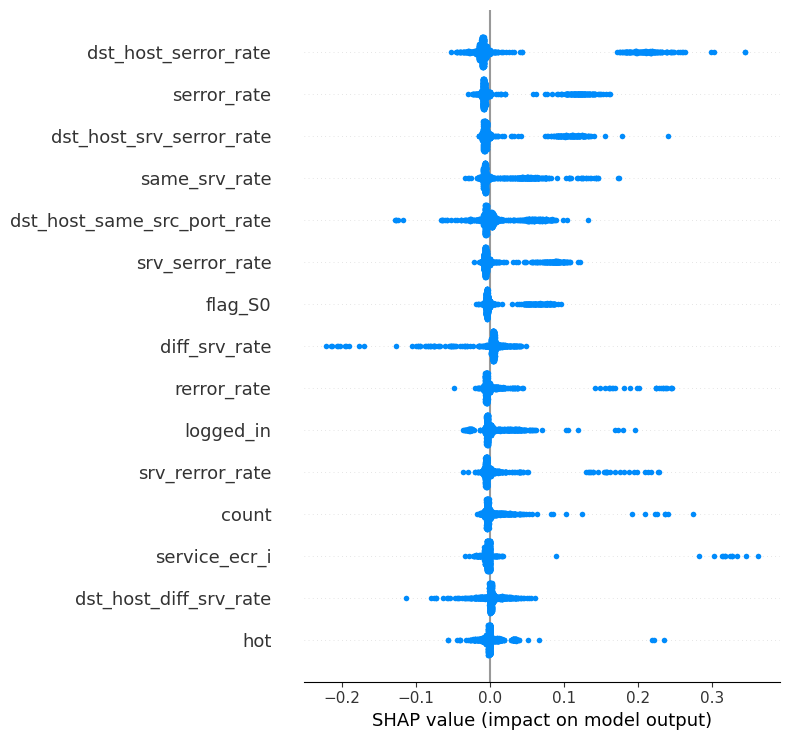

In [7]:
vals = shape_values[0]
# print the summary plot
shap.summary_plot(vals, feature_names= X.columns, class_names=['dos', 'normal', 'probe', 'r2l', 'u2r'], max_display=15)

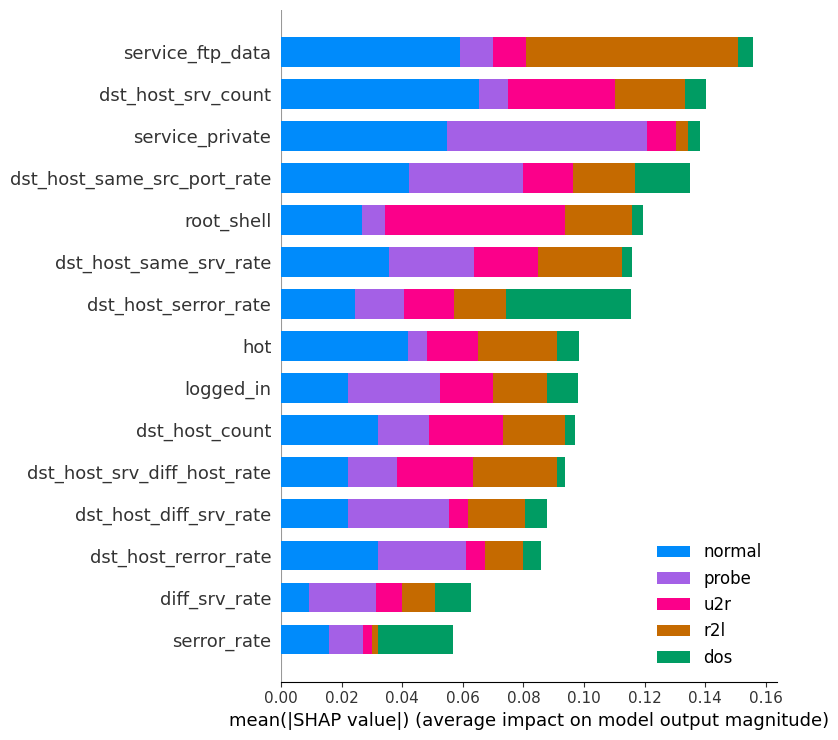

In [8]:
shap.summary_plot(shape_values,X_test2, feature_names= X.columns, class_names=['dos', 'normal', 'probe', 'r2l', 'u2r'], max_display=15)

In [5]:
# service_ftp_data dst_host_srv_count dst_host_same_src_port_rate service_private dst_host_serror_rate dst_host_same_srv_rate root_shell logged_in hot dst_host_srv_diff_host_rate dst_host_count dst_host_rerror_rate dst_host_diff_srv_rate service_eco_i protocol_type_tcp only takes these columns into account
df = pd.read_csv('KDDTrain+_cleaned.csv')
X = df[['service_ftp_data','dst_host_srv_count','dst_host_same_src_port_rate','service_private','dst_host_serror_rate','dst_host_same_srv_rate','root_shell','logged_in','hot','dst_host_srv_diff_host_rate','dst_host_count','dst_host_rerror_rate','dst_host_diff_srv_rate','service_eco_i','protocol_type_tcp']]
y = df['type']
# one hot encoding
y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# convert to numpy array
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(Conv1D(64, 3,activation="relu",input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(64, 3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

mc = ModelCheckpoint('cnn_shap_best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

start = time.time()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[mc])
end = time.time()
print("Time taken to train the model: ", end-start)


Epoch 1/10


C:\Users\Ameya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8382/8418 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9014 - loss: 0.2909
Epoch 1: val_accuracy improved from -inf to 0.95734, saving model to cnn_shap_best_model.keras
8418/8418 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9016 - loss: 0.2905 - val_accuracy: 0.9573 - val_loss: 0.1266
Epoch 2/10
8378/8418 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9540 - loss: 0.1328
Epoch 2: val_accuracy improved from 0.95734 to 0.96095, saving model to cnn_shap_best_model.keras
8418/8418 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.9540 - loss: 0.1328 - val_accuracy: 0.9609 - val_loss: 0.1032
Epoch 3/10
8411/8418 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9620 - loss: 0.1090
Epoch 3: val_accuracy improved from 0.96095 to 0.97036, saving model to cnn_shap_best_model.keras
8418/8418 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9620 - loss: 0.1090 - val_accuracy: 0.9704 - val_loss: 0.0800
Epoch 4/10
8387/8418 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9659 - loss: 0.0962
Epoch 4:

In [6]:
model = history.model
start = time.time()
y_pred = model.predict(X_test)
end = time.time()
print("Time taken to predict: ", end-start)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

2105/2105 ━━━━━━━━━━━━━━━━━━━━ 2s 762us/step
Time taken to predict:  2.315981149673462
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13340
           1       0.99      0.97      0.98     13507
           2       0.99      0.99      0.99     13499
           3       0.96      0.98      0.97     13629
           4       0.97      0.97      0.97     13368

    accuracy                           0.98     67343
   macro avg       0.98      0.98      0.98     67343
weighted avg       0.98      0.98      0.98     67343

0.9812155680620109


In [14]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True)
X = df[['service_ftp_data','dst_host_srv_count','dst_host_same_src_port_rate','service_private','dst_host_serror_rate','dst_host_same_srv_rate','root_shell','logged_in','hot','dst_host_srv_diff_host_rate','dst_host_count','dst_host_rerror_rate','dst_host_diff_srv_rate','service_eco_i','protocol_type_tcp']]
y = df['type']
Y = pd.get_dummies(y).to_numpy()
# reshape the data for LSTM
X_fit = X.values.reshape((X.shape[0],X.shape[1], 1))
X_fit = np.asarray(X_fit).astype(np.float32)

# define the model
model = Sequential()
model.add(Conv1D(64, 3,activation="relu",input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

mc = ModelCheckpoint('cnn_shap_best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


accuracies = []

for train_idx, test_idx in kfold.split(X_fit):
    X_train, X_test = X_fit[train_idx], X_fit[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]
    model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=0)
    accuracy = model.evaluate(X_test, Y_test, verbose=0)[1]
    print(accuracy)
    accuracies.append(accuracy)

print(accuracies)
#mean accuracy
print("Mean- ",np.mean(accuracies))

C:\Users\Ameya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0.98099285364151
0.9876008033752441
0.9873632192611694
0.9876750111579895
0.9879571795463562
[0.98099285364151, 0.9876008033752441, 0.9873632192611694, 0.9876750111579895, 0.9879571795463562]
Mean-  0.9863178133964539


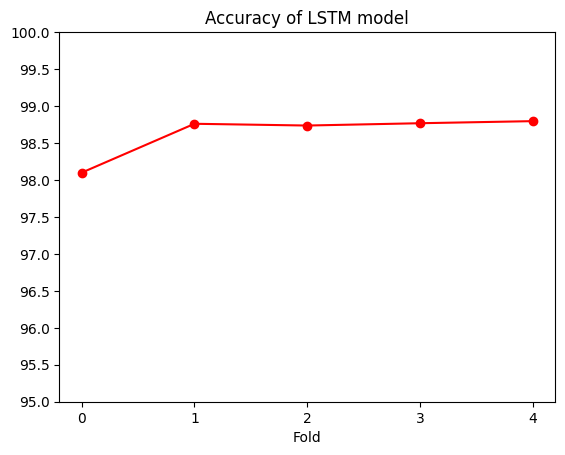

In [15]:
list = [0.98099285364151, 0.9876008033752441, 0.9873632192611694, 0.9876750111579895, 0.9879571795463562]
# times 100 the list
list = [i * 100 for i in list]
# plot the list 
import numpy as np
import matplotlib.pyplot as plt
#make the plot such that each fold accuracy is circled but also connected by a line
plt.plot(list, 'ro-')
# y label should be from 95 to 100 with 0.5 intervals
plt.yticks(np.arange(95, 100.5, 0.5))
# x label should only be whole numbers
plt.xticks(np.arange(0, 5, 1))
plt.xlabel('Fold')
plt.title('Accuracy of LSTM model')
plt.show()

In [16]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True)
X = df[['service_ftp_data','dst_host_srv_count','dst_host_same_src_port_rate','service_private','dst_host_serror_rate','dst_host_same_srv_rate','root_shell','logged_in','hot','dst_host_srv_diff_host_rate','dst_host_count','dst_host_rerror_rate','dst_host_diff_srv_rate','service_eco_i','protocol_type_tcp']]
y = df['type']
Y = pd.get_dummies(y).to_numpy()
# reshape the data for LSTM
X_fit = X.values.reshape((X.shape[0],X.shape[1], 1))
X_fit = np.asarray(X_fit).astype(np.float32)

# define the model
model = Sequential()
model.add(Conv1D(64, 3,activation="relu",input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

mc = ModelCheckpoint('cnn_shap_best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


accuracies = []

for train_idx, test_idx in kfold.split(X_fit):
    X_train, X_test = X_fit[train_idx], X_fit[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]
    model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=0)
    accuracy = model.evaluate(X_test, Y_test, verbose=0)[1]
    print(accuracy)
    accuracies.append(accuracy)

print(accuracies)
#mean accuracy
print("Mean- ",np.mean(accuracies))

C:\Users\Ameya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0.9848836064338684
0.9881206750869751
0.9879128336906433
0.9897243976593018
0.9898431897163391
0.9899616837501526
0.9891003966331482
0.9871996641159058
0.9905556440353394
0.9907041788101196
[0.9848836064338684, 0.9881206750869751, 0.9879128336906433, 0.9897243976593018, 0.9898431897163391, 0.9899616837501526, 0.9891003966331482, 0.9871996641159058, 0.9905556440353394, 0.9907041788101196]
Mean-  0.9888006269931793


0.9888006269931793


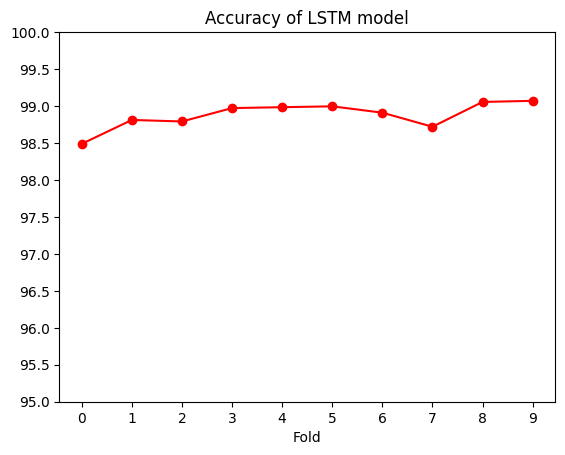

In [1]:
import numpy as np
import matplotlib.pyplot as plt
list = [0.9848836064338684, 0.9881206750869751, 0.9879128336906433, 0.9897243976593018, 0.9898431897163391, 0.9899616837501526, 0.9891003966331482, 0.9871996641159058, 0.9905556440353394, 0.9907041788101196]
# times 100 the list
print(np.mean(list))
list = [i * 100 for i in list]
#make the plot such that each fold accuracy is circled but also connected by a line
plt.plot(list, 'ro-')
# y label should be from 95 to 100 with 0.5 intervals
plt.yticks(np.arange(95, 100.5, 0.5))
# x label should only be whole numbers
plt.xticks(np.arange(0, 10, 1))
plt.xlabel('Fold')
plt.title('Accuracy of LSTM model')
plt.show()

In [13]:
#save the shap values in pickle file
import pickle
with open('shap_values.pkl', 'wb') as f:
    pickle.dump(shape_values, f)


In [3]:
#load the pkl file
import pickle
with open('nsl-shap_values.pkl', 'rb') as f:
    shape_values = pickle.load(f)

In [4]:
df = pd.read_csv('KDDTrain+_cleaned.csv')
X = df.drop(['type','class'], axis=1)
y = df['type']
# one hot encoding
y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# convert to numpy array
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_test2 = np.squeeze(X_test)
X_test2.shape
X_train2 = np.squeeze(X_train)
X_train2.shape

(269372, 120)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


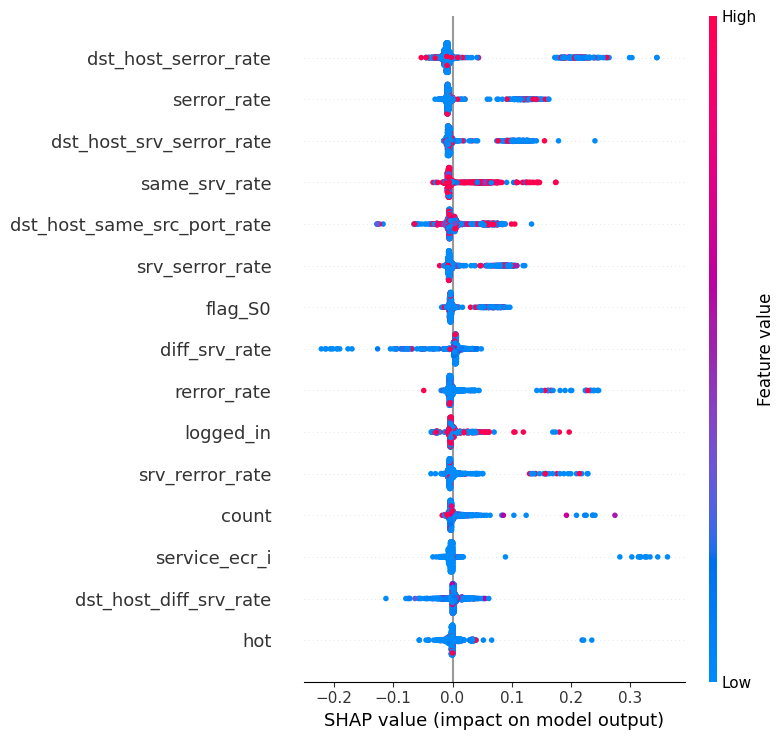

In [6]:
vals = shape_values[0]
import shap
# print the summary plot
shap.summary_plot(vals,X_test2[0:1000] ,feature_names= X.columns, class_names=['dos', 'normal', 'probe', 'r2l', 'u2r'],max_display=15)